##### Provide by

นายธนชาติ เสถียรจารุการ 63340500021 <br>

นายพชพล เพชรรัตน์ 63340500036

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

df = pd.read_csv('credit_card_churn.csv')
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'CLIENTNUM'], axis=1)

##### Data exploration

plot numerical data

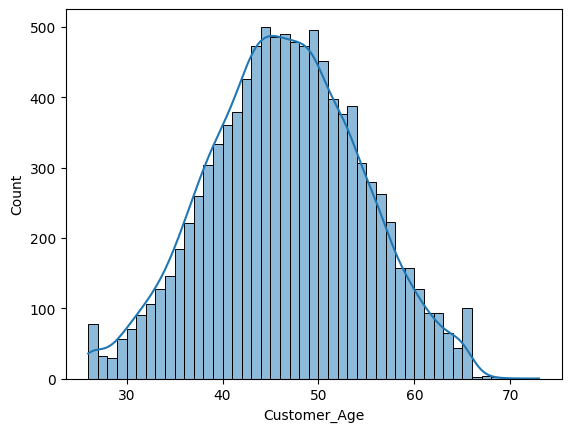

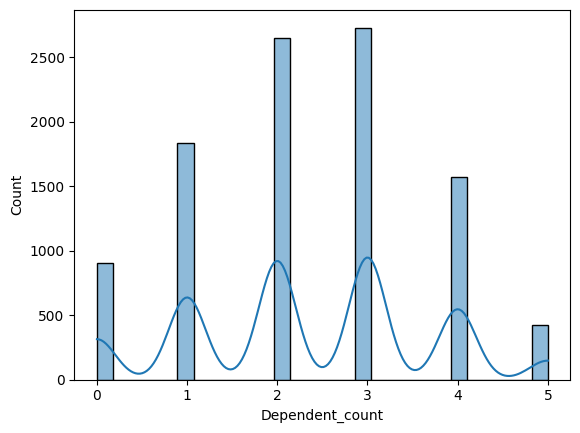

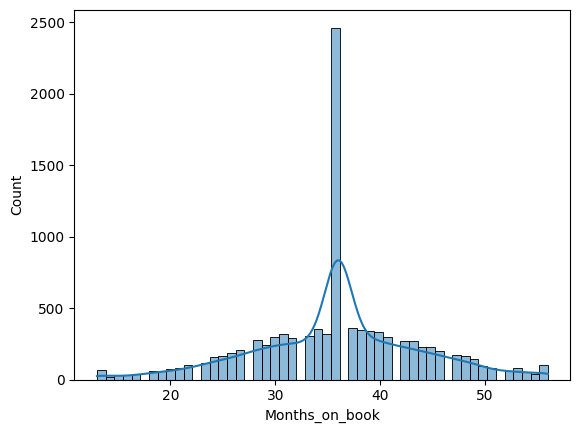

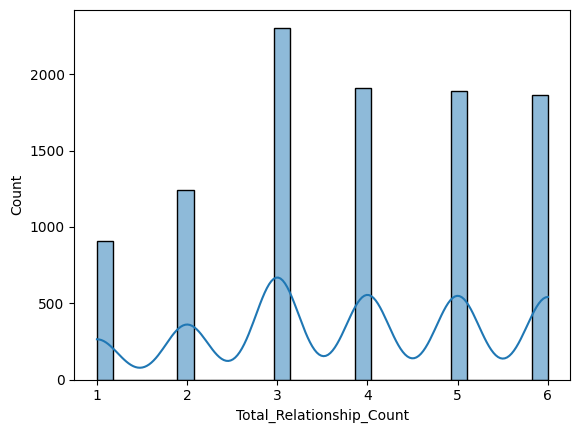

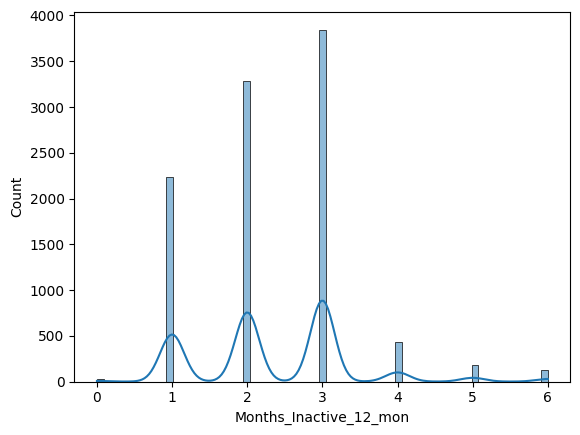

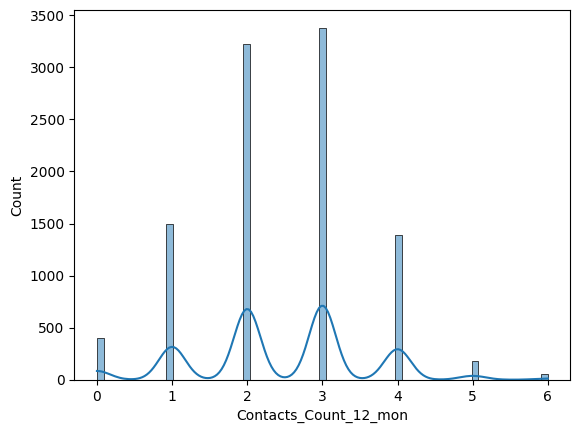

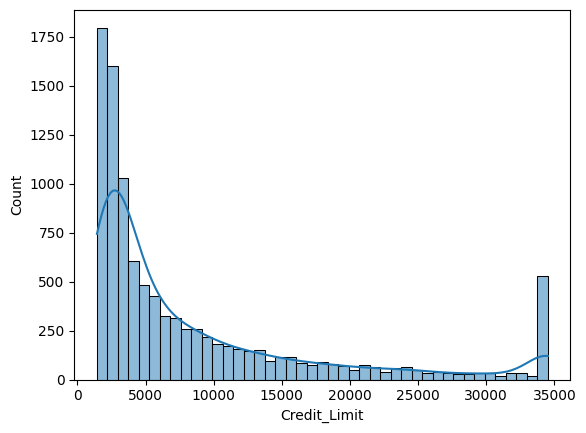

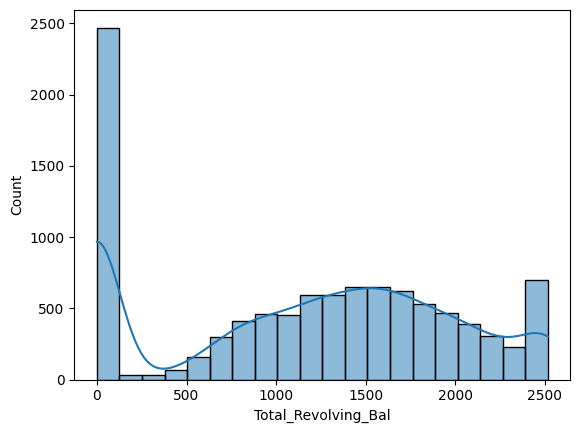

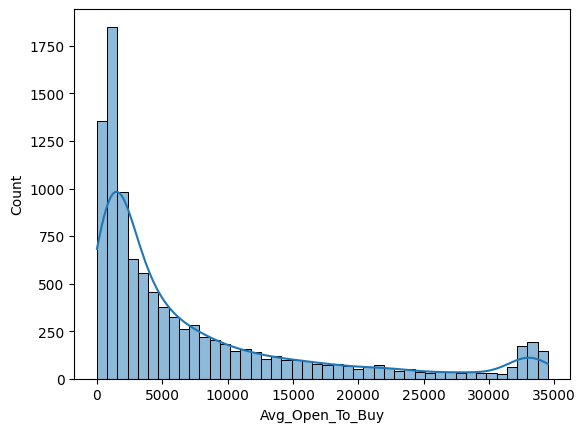

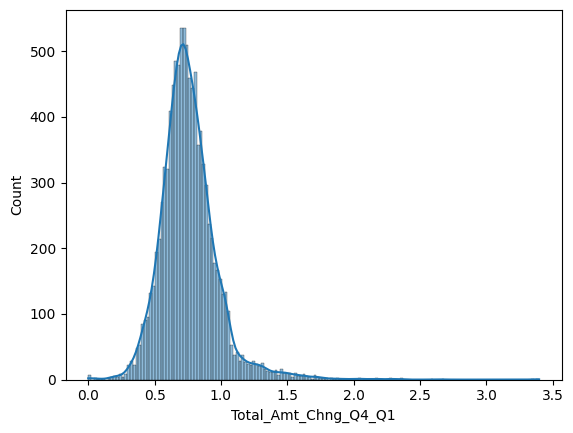

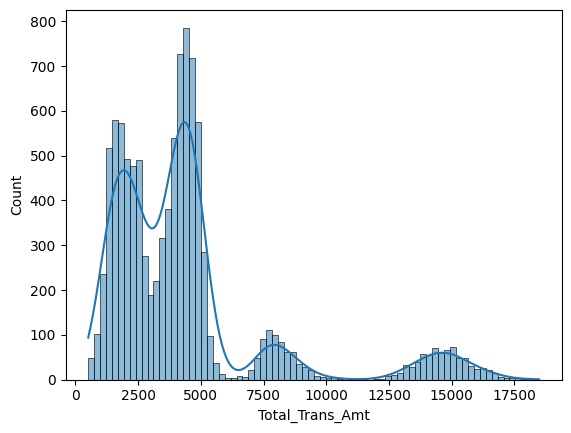

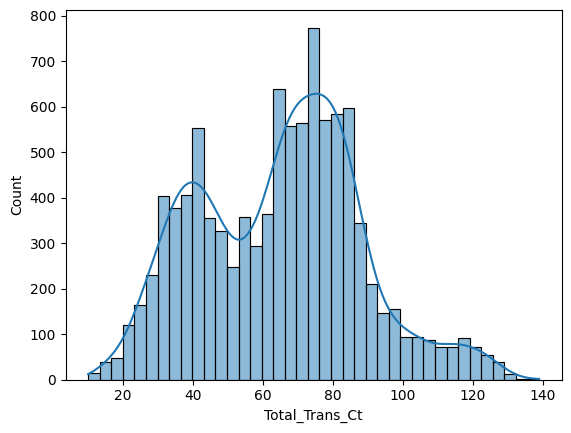

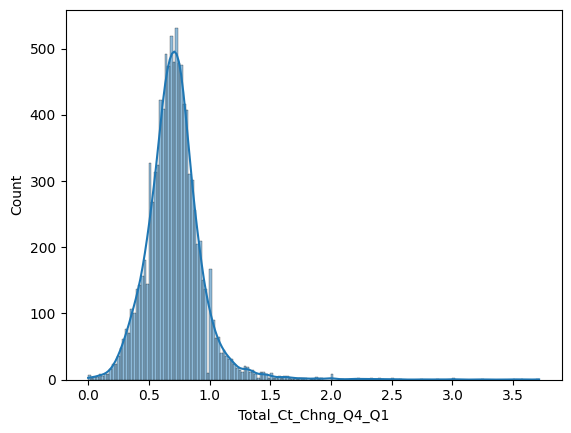

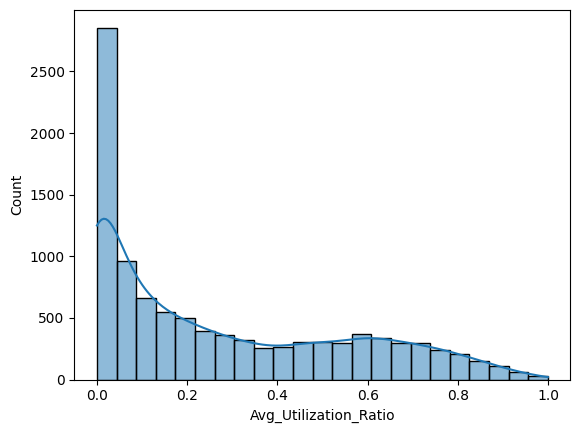

In [2]:
###### plot numerical data
cols = df.columns
num_data = list(df._get_numeric_data().columns)
cat_data = list(set(cols) - set(num_data))
for i in num_data:
    sns.histplot(data = df, x = i, kde = True)
    plt.show()

จากการ plot numerical data
- ข้อมูล Customer_Age มี outlier ที่อายุมากกว่า 66
- ข้อมูล Total_Ct_Chng_Q4_Q1 มี outlier ที่จำนวนมากกว่า 1.6
- ข้อมูล Contact_Count_12_mon จำนวน 6 ครั้งมีน้อยมากจึงพิจารณาเป็น outlier
- ข้อมูล Total_Amt_Chng_Q4_Q1 มี outlier ที่จำนวนมากกว่า 1.6
- ข้อมูล Credit_Limit, Avg_Open_To_Buy, Total_Trans_Amt และ Avg_Utilization_Ratio มีความเบ้ขวา

Remove Outlier and Correct Skewed data

In [3]:
##### remove outlier
df = df.loc[df['Customer_Age'] <= 66]
df = df.loc[df['Total_Ct_Chng_Q4_Q1'] <= 1.6]
df = df.loc[df['Months_Inactive_12_mon'] < 6]
df = df.loc[df['Total_Amt_Chng_Q4_Q1'] <= 1.6]

##### correct skewed data
df['Credit_Limit'] = np.log10(df['Credit_Limit'])
fitted_data, fitted_lambda = stats.boxcox(df['Avg_Open_To_Buy'])
df['Avg_Open_To_Buy'] = fitted_data
df['Total_Trans_Amt'] = np.log10(df['Total_Trans_Amt'])
df['Avg_Utilization_Ratio'] = (df['Avg_Utilization_Ratio'])**(1/2)

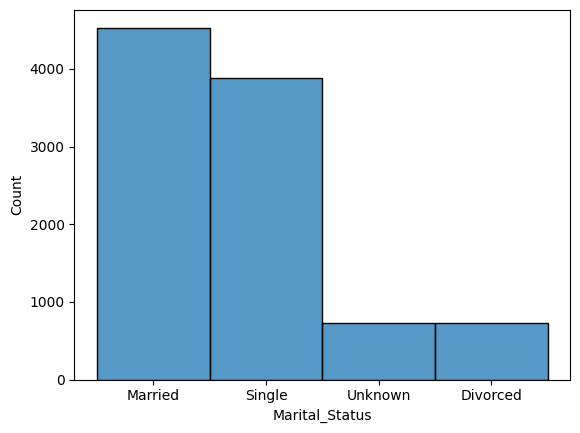

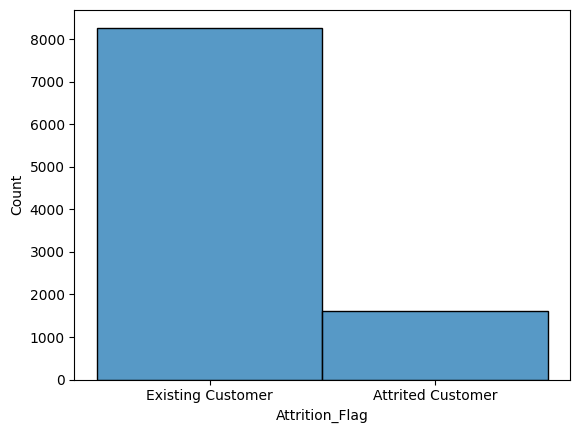

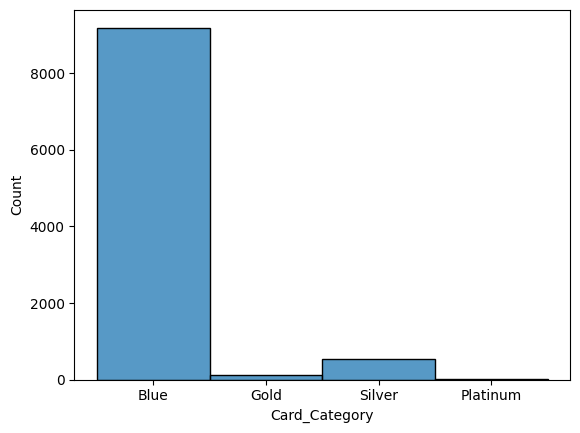

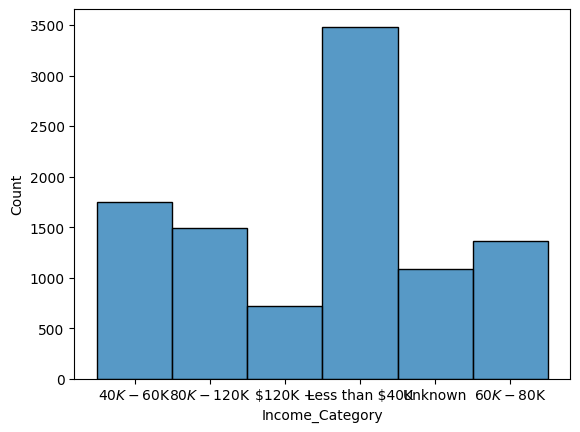

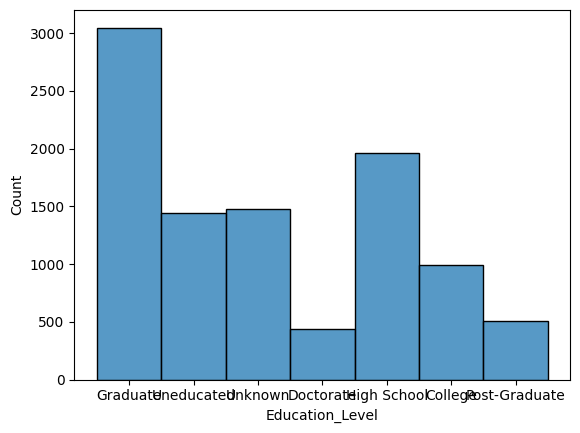

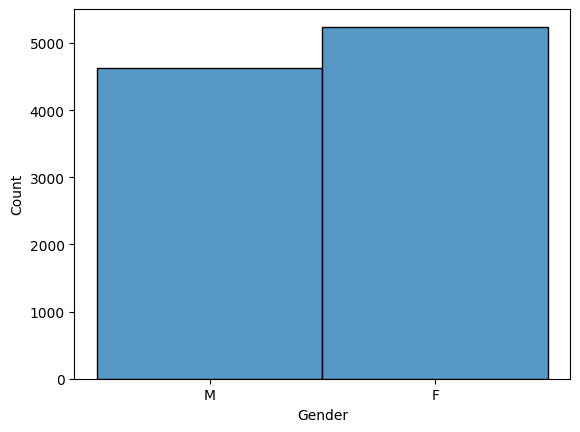

In [4]:
for i in cat_data:
    sns.histplot(data = df, x = i, kde = False)
    plt.show()

จากการ plot Categorical data
- ข้อมูล output หรือ Attrition_Flag มีความ Imbalance โดย Attrited Customer คิดเป็นเพียง 16% ของข้อมูลทั้งหมด
- ข้อมูล Card_Category ที่เป็นระดับ platinum มีจำนวนผู้ใช้งานเพียง 0.002% จากข้อมูลทั้งหมดจึงทำการลบ instance เหล่านี้ทิ้ง

In [5]:
print(df['Card_Category'].value_counts())
df = df.loc[df['Card_Category'] != 'Platinum']

Blue        9197
Silver       546
Gold         113
Platinum      20
Name: Card_Category, dtype: int64


Plot Heatmap เพื่อดูความสัมพันธุ์ระหว่าง Output กับข้อมูลประเภท Numerical

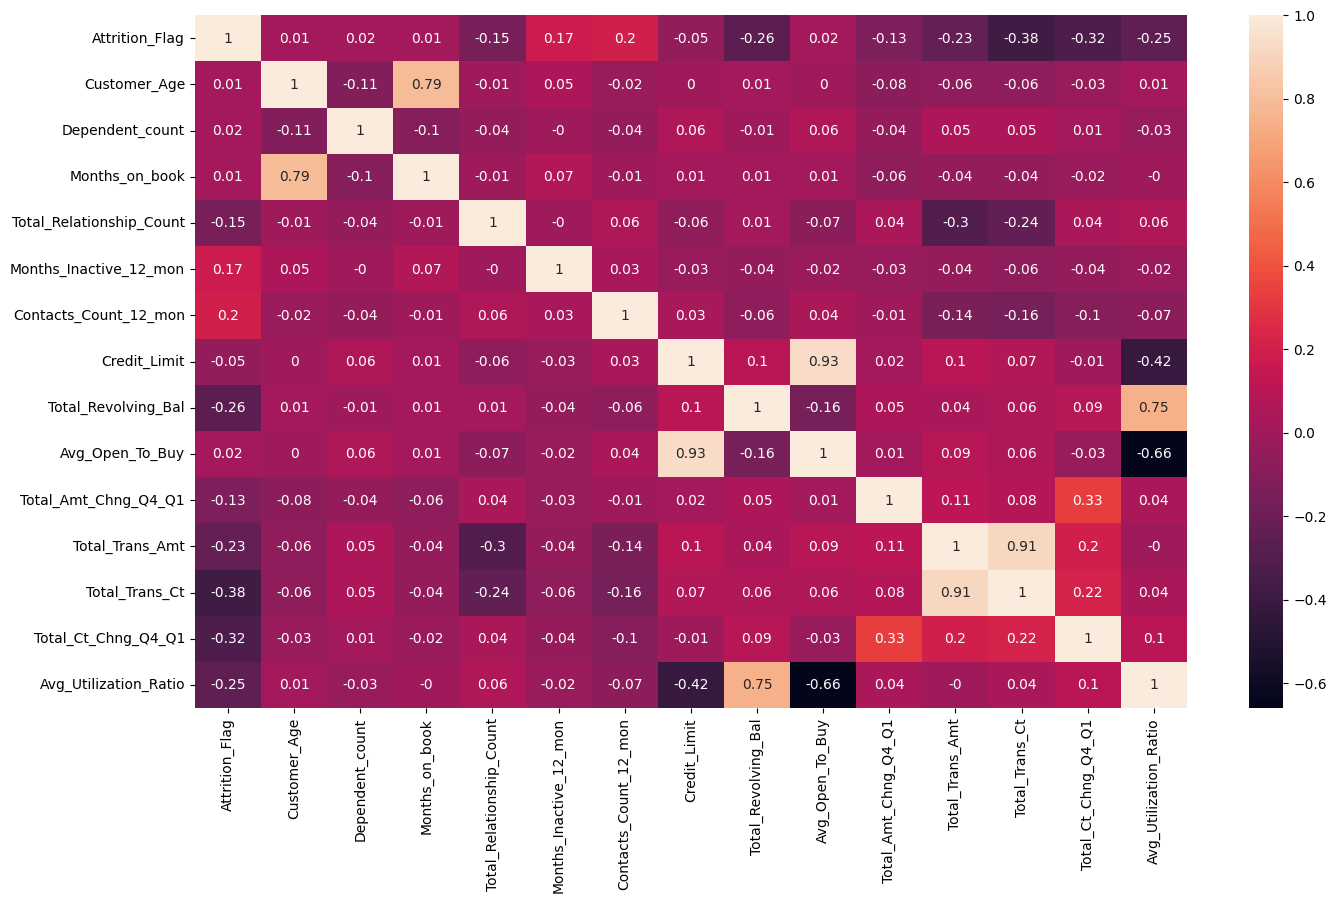

In [6]:
df['Attrition_Flag'] = df['Attrition_Flag'].replace(['Existing Customer', 'Attrited Customer'], [0, 1])
plt.figure(figsize = (16,9))
sns.heatmap(round(df.corr(),2),annot=True)
plt.show()

จากการ Plot Heatmap พบว่าค่าความสัมพันธุ์ของ feature กับ Output ที่มีค่ามากกว่า 0.1 เรียงจากมากไปน้อยได้ดังนี้
- Total_Trans_Ct
- Total_Ct_Chng_Q4_Q1
- Total_Revolving_Bal
- Avg_Utilization_Ratio
- Total_Trans_Amt
- Contacts_Count_12_mon
- Months_Inactive_12_mon
- Total_Relationship_Count
- Total_Amt_Chng_Q4_Q1

และความความสัมพันธ์ระหว่างข้อมูล ที่มีค่ามากกว่า 0.1 เรียงจากมากไปน้อยได้ดังนี้
- 0.93 : Avg_Open_To_Buy / Credit_Limit
- 0.91 : Total_Trans_Ct / Total_Trans_Amt
- 0.79 : Months_on_book / Customer_Age
- 0.75 : Avg_Utilization_Ratio / Total_Revolving_Bal
- 0.66 : Avg_Utilization_Ratio / Avg_Open_To_Buy
- 0.42 : Avg_Utilization_Ratio / Credit_Limit
- 0.33 : Total_Ct_Chng_Q4_Q1 / Total_Amt_Chng_Q4_Q1
- 0.30 : Total_Trans_Amt / Total_Relationship_Count
- 0.24 : Total_Trans_Ct / Total_Relationship_Count
- 0.22 : Total_Ct_Chng_Q4_Q1 / Total_Trans_Ct
- 0.20 : Total_Ct_Chng_Q4_Q1 / Total_Trans_Amt
- 0.16 : Total_Trans_Ct  / Contacts_Count_12_mon
- 0.14 : Total_Trans_Amt / Contacts_Count_12_mon
- 0.11 : Total_Trans_Amt / Total_Amt_Chng_Q4_Q1
- 0.11 : Dependent_count / Customer_Age
- 0.10 : Total_Ct_Chng_Q4_Q1 / Contacts_Count_12_mon
- 0.10 : Total_Trans_Amt / Credit_Limit
- 0.10 : Avg_Utilization_Ratio / Total_Ct_Chng_Q4_Q1
- 0.10 : Total_Revolving_Bal / Credit_Limit
- 0.10 : Months_on_book / Dependent_count

Plot ข้อมูลที่มีความสัมพันธุ์กับ Output
- ข้อมูลที่มีความสัมพันธุ์กับ output ที่มากที่สุดคือ 0.38 หรือข้อมูล Total_Trans_Ct พบว่าข้อมูลส่วนใหญ่มีการแบ่งกลุ่มอย่างเห็นได้ชัด
- ข้อมูลที่มีความสัมพันธุ์กับ output ที่น้อยกว่า 0.38 แต่มากกว่า 0.2 มีการแบ่งกลุ่มกันแต่มีบางส่วนที่ซ้อนทับกันอยู่
- ข้อมูลที่มีความสัมพันธุ์กับ output ที่น้อยกว่าหรือเท่ากับ 0.2 มีการซ้อนทับกันของข้อมูลอย่างเห็นได้ชัด

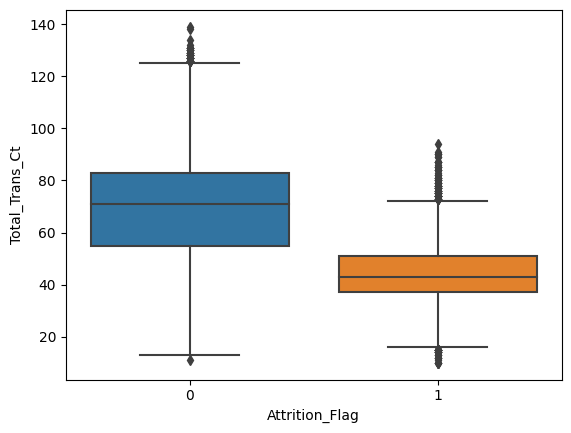

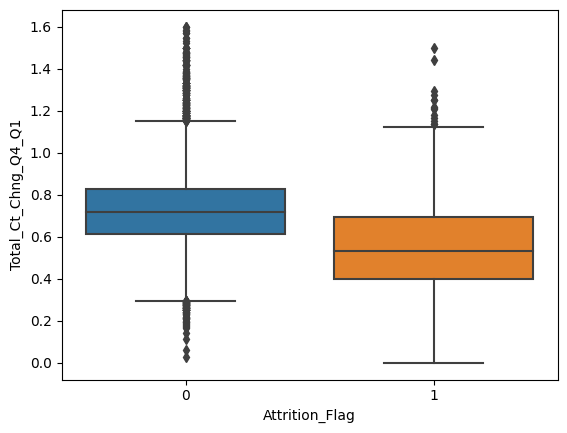

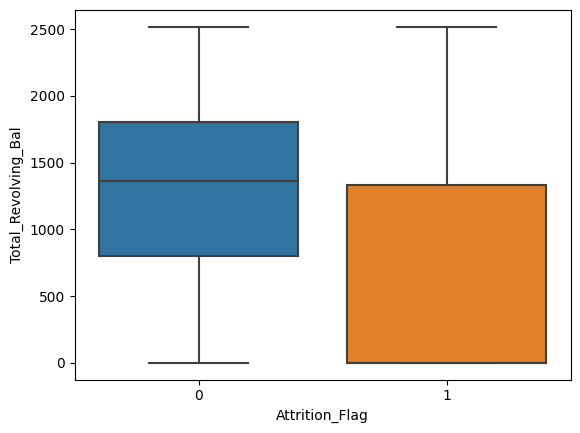

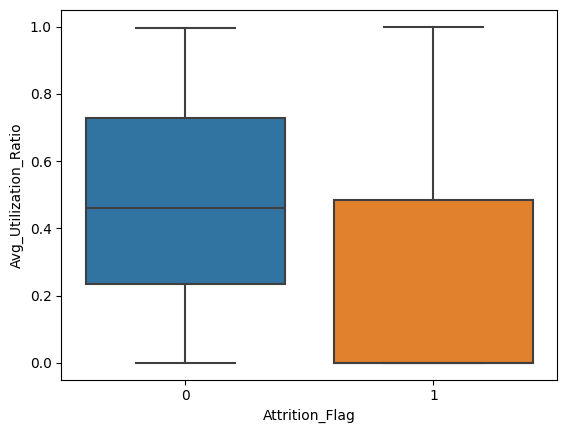

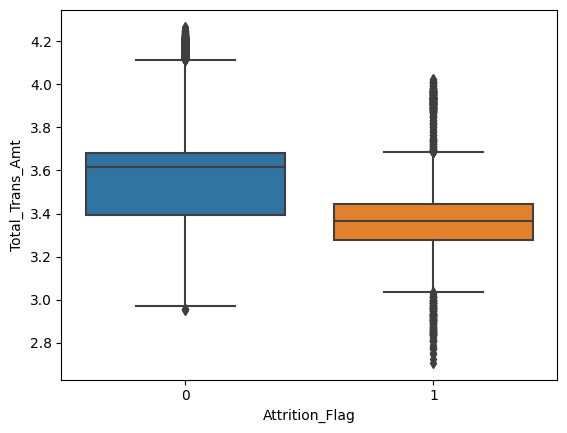

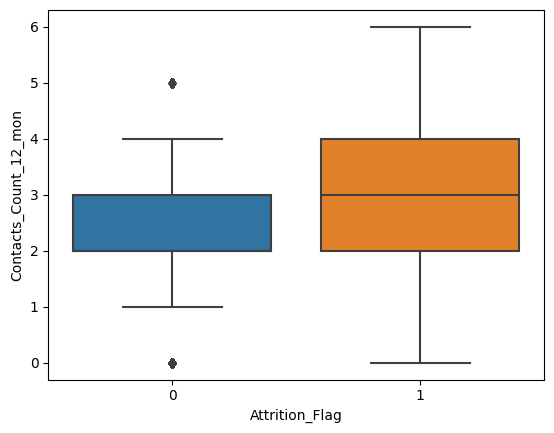

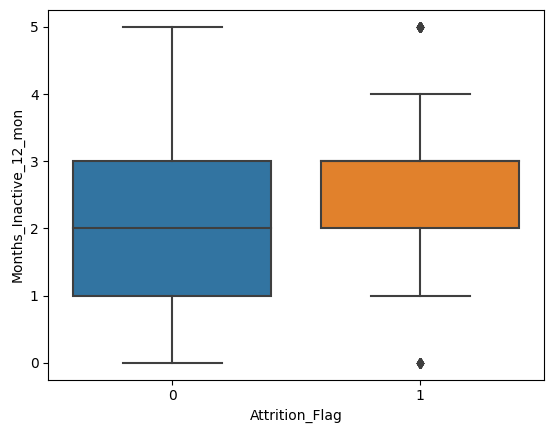

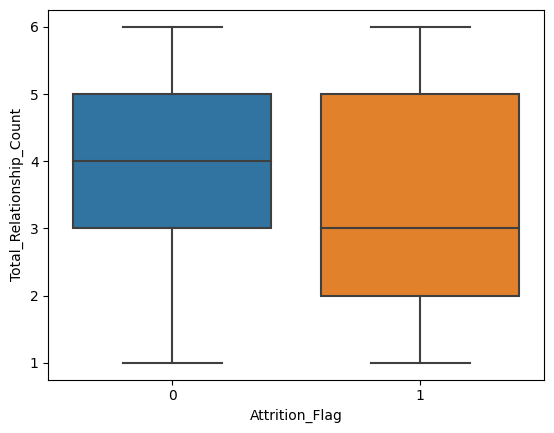

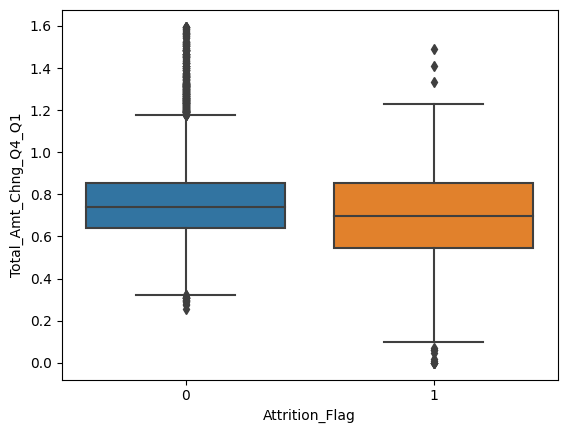

In [7]:
cols = list(df.columns)
relate2output = ['Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio', 'Total_Trans_Amt', 'Contacts_Count_12_mon', 'Months_Inactive_12_mon', 'Total_Relationship_Count', 'Total_Amt_Chng_Q4_Q1']

for i in relate2output:
    sns.boxplot(data = df, x = 'Attrition_Flag', y = i)
    plt.show()

Plot ข้อมูลที่มี relation ระหว่างข้อมูลกันเองที่มีความสัมพันธุ์มากกว่า 0.66
- กราฟ Credit_Limit เทียบ Avg_Open_To_Buy พบว่ามีความสัมพันธุ์ทางคณิตศาสตร์จึงทำให้เลือกตัดข้อมูล Avg_Open_To_Buy เนื่องจากมีความสัมพันธุ์เทียบกับ Output น้อยกว่า Credit_Limit
- กราฟ Total_Trans_Ct เทียบ Total_Trans_Amt พบว่ามีแนวโน้มไปในทางเดียวกันแต่มองเห็นถึงการแบ่งกลุ่มของ output จึงเลือกที่จะเก็บข้อมูลทั้งสองเอาไว้ก่อน
- กราฟ Months_on_book เทียบ Customer_Age พบว่ามีความสัมพันธุ์ทางคณิตศาสตร์อย่างชัดเจนซึ่งทั้งสองมีความสัมพันธุ์กับ output ต่ำมากและจากกราฟไม่แสดงให้เห็นถึงการแบ่งกลุ่มของ Output จึงเป็นเหตุผลที่เลือกตัดทิ้งทั้งสองข้อมูล
- กราฟ Avg_Utilization_Ratio เทียบ Total_Revolving_Bal พบว่ามีความสัมพันธุ์กันแต่อยู่ในขอบเขตที่กว้างและเห็นถึงข้อมูล Attrited Customer บางส่วนในช่วง (0,0) ถึง (0.6, 500)
- กราฟ Avg_Utilization_Ratio เทียบ Avg_Open_To_Buy มีความสัมพันธุ์ทางคณิตศาสตร์ที่ชัดเจนมากและจาก plot กราฟ Credit_Limit เทียบ Avg_Open_To_Buy ที่ได้เลือกทำการตัด Avg_Open_To_Buy จึงเก็บข้อมูล Avg_Utilization_Ratio เอาไว้
- กราฟ Avg_Utilization_Ratio เทียบ Credit_Limit พบเห็นความสัมพันธุ์ทางคณิตศาสตร์แต่อยู่ในช่วงที่กว้างและตรงขอบของกราฟมีการกระจายตัวของ Output อยู่จึงทำให้เลือกเก็บข้อมูลทั้งสองข้อมูลเอาไว้

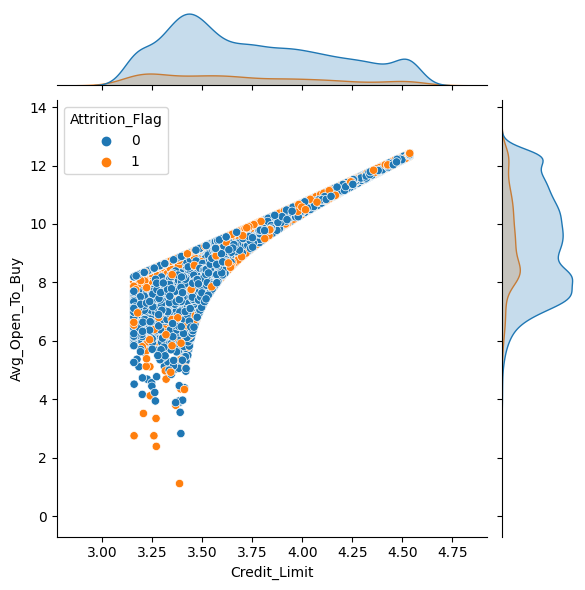

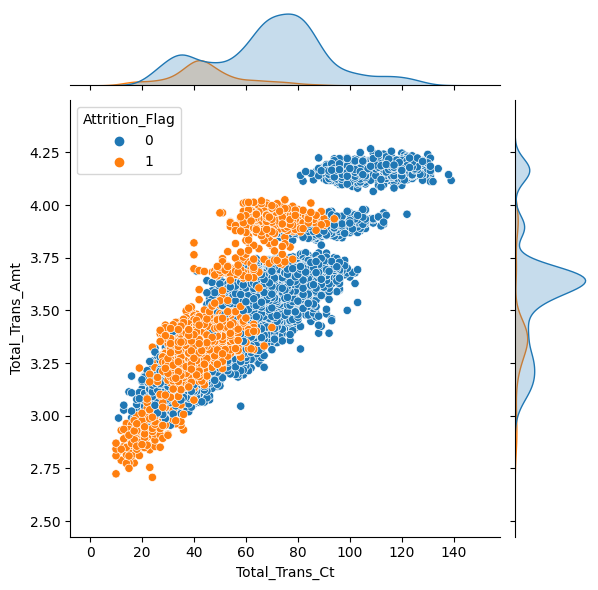

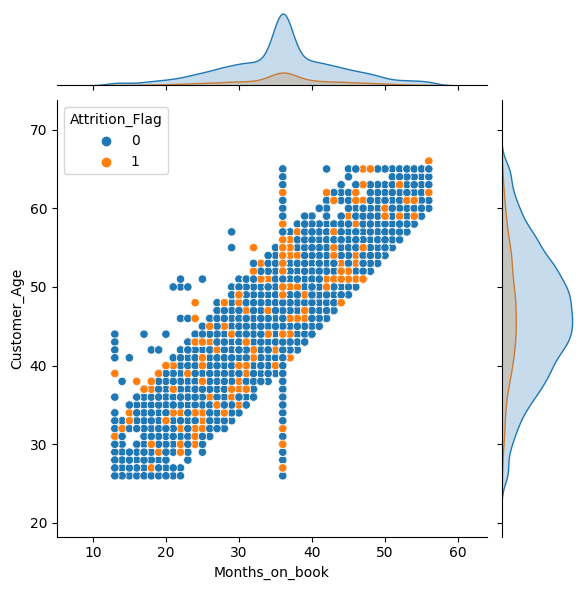

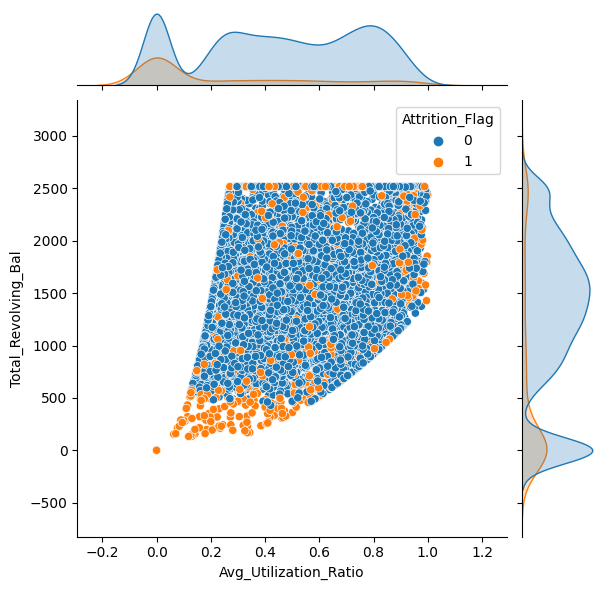

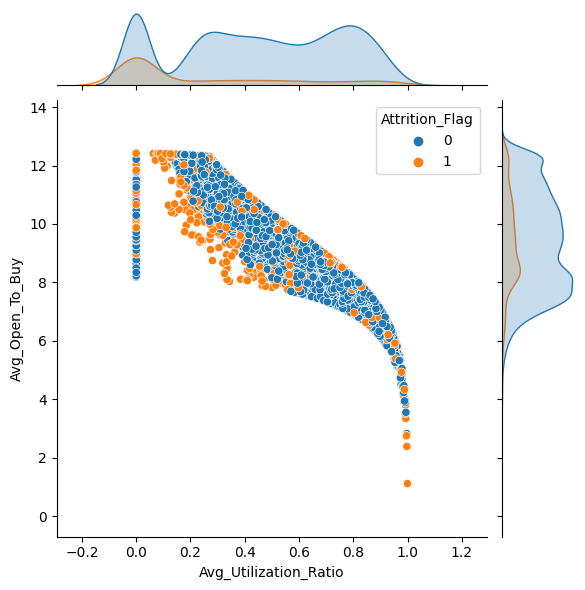

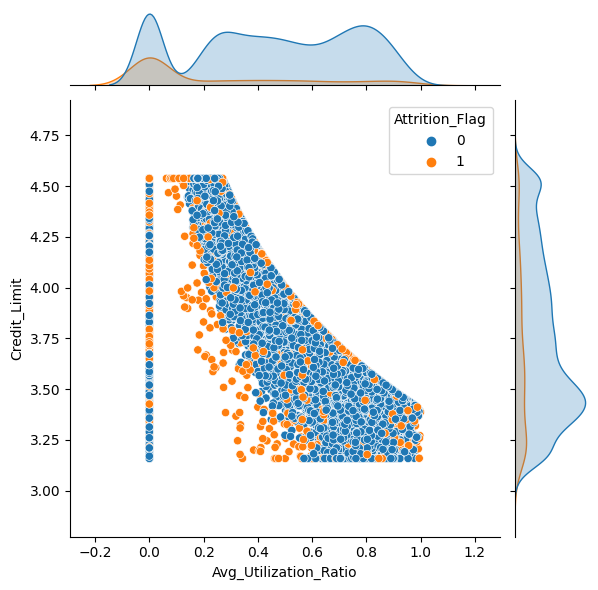

In [8]:
sns.jointplot(data = df, x = 'Credit_Limit', y = 'Avg_Open_To_Buy', hue = 'Attrition_Flag')
plt.show()
sns.jointplot(data = df, x = 'Total_Trans_Ct', y = 'Total_Trans_Amt', hue = 'Attrition_Flag')
plt.show()
sns.jointplot(data = df, x = 'Months_on_book', y = 'Customer_Age', hue = 'Attrition_Flag')
plt.show()
sns.jointplot(data = df, x = 'Avg_Utilization_Ratio', y = 'Total_Revolving_Bal', hue = 'Attrition_Flag')
plt.show()
sns.jointplot(data = df, x = 'Avg_Utilization_Ratio', y = 'Avg_Open_To_Buy', hue = 'Attrition_Flag')
plt.show()
sns.jointplot(data = df, x = 'Avg_Utilization_Ratio', y = 'Credit_Limit', hue = 'Attrition_Flag')
plt.show()

Plot ข้อมูลที่มี relation ระหว่างข้อมูลกันเองที่มีความสัมพันธุ์มากกว่า 0.66
- จากการ plot กราฟที่มีความสัมพันธ์กันเองที่เหลือทั้งหมดพบว่าไม่เห็นถึงความสัมพันธ์ทางคณิตศาสตร์ที่ชัดเจนจึงทำให้เลือกที่จะไม่ตัดข้อมูลใดออก

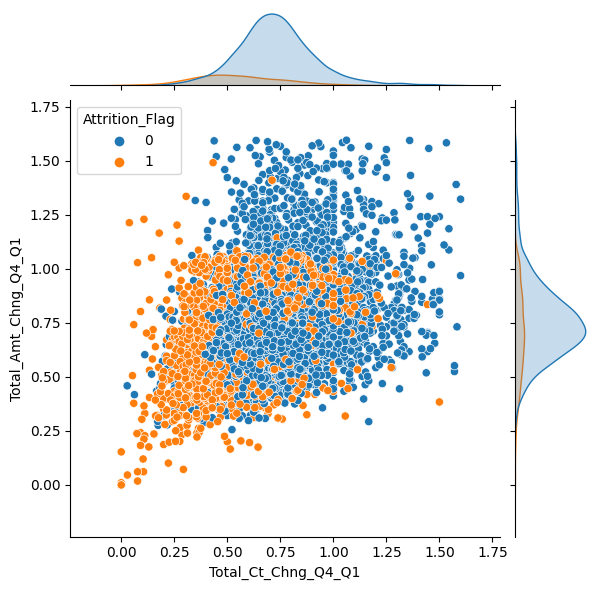

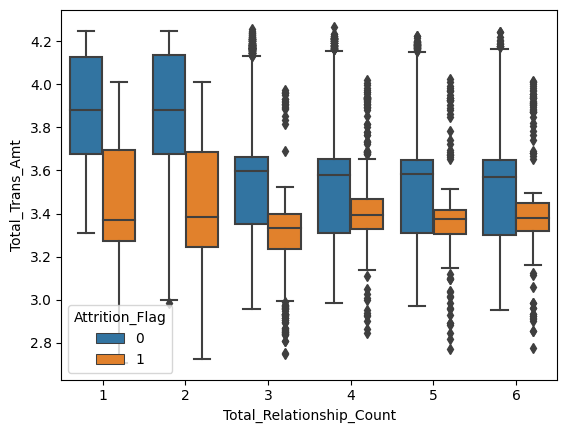

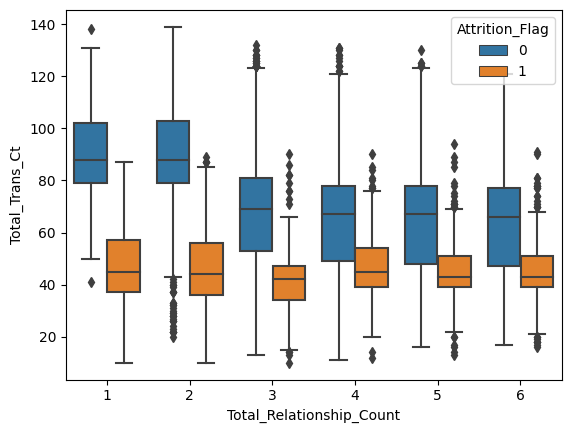

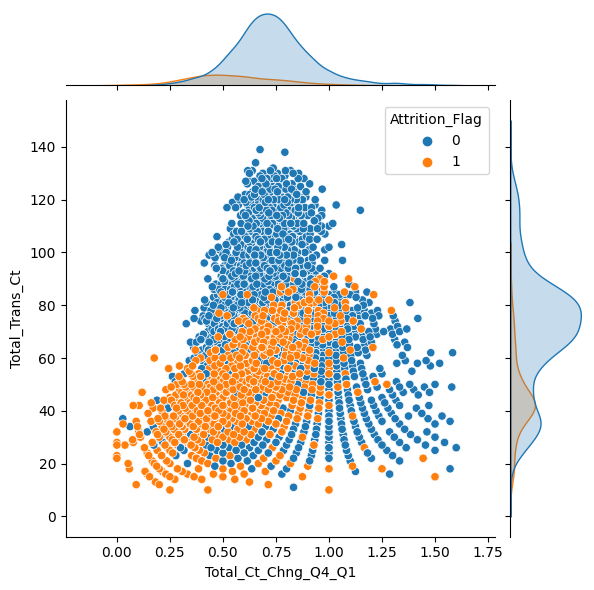

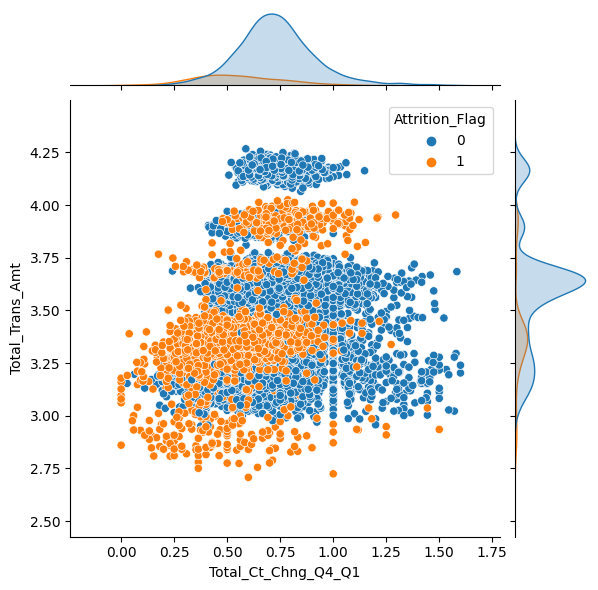

In [9]:
sns.jointplot(data = df, x = 'Total_Ct_Chng_Q4_Q1', y = 'Total_Amt_Chng_Q4_Q1', hue = 'Attrition_Flag')
plt.show()
sns.boxplot(data = df, x = 'Total_Relationship_Count', y = 'Total_Trans_Amt', hue = 'Attrition_Flag')
plt.show()
sns.boxplot(data = df, x = 'Total_Relationship_Count', y = 'Total_Trans_Ct', hue = 'Attrition_Flag')
plt.show()
sns.jointplot(data = df, x = 'Total_Ct_Chng_Q4_Q1', y = 'Total_Trans_Ct', hue = 'Attrition_Flag')
plt.show()
sns.jointplot(data = df, x = 'Total_Ct_Chng_Q4_Q1', y = 'Total_Trans_Amt', hue = 'Attrition_Flag')
plt.show()

สรุปจากการ plot ความสัมพันธ์ระหว่างข้อมูลกันเองทำให้เลือกตัดข้อมูลดังต่อไปนี้
- Avg_Open_To_Buy
- Months_on_book
- Customer_Age

ข้อมูลที่ยังไม่ได้ทำการวิเคราะห์แบ่งเป็น
- numerical data
    - Credit_Limit
<br>
<br>

- categorical data
    - Dependent_count
    - Marital_Status
    - Gender
    - Education_Level
    - Card_Category
    - Income_Category

In [10]:
df = df.drop(['Avg_Open_To_Buy', 'Months_on_book', 'Customer_Age'], axis = 1)
cols = list(df.columns)
cols.remove('Attrition_Flag')
num_data = list(df._get_numeric_data().columns)
num_data.remove('Attrition_Flag')
cat_data = list(set(cols) - set(num_data))
num_data.remove('Dependent_count')
num_data.remove('Total_Relationship_Count')
num_data.remove('Months_Inactive_12_mon')
num_data.remove('Contacts_Count_12_mon')
cat_data.append('Dependent_count')
cat_data.append('Total_Relationship_Count')
cat_data.append('Months_Inactive_12_mon')
cat_data.append('Contacts_Count_12_mon')

ex_cols = list(set(df.columns) - set(relate2output))
ex_num_data = list(set(df._get_numeric_data().columns) - set(relate2output))
ex_cat_data = list(set(ex_cols) - set(num_data))
print(ex_num_data)
print(ex_cat_data)

['Attrition_Flag', 'Credit_Limit', 'Dependent_count']
['Marital_Status', 'Attrition_Flag', 'Card_Category', 'Income_Category', 'Education_Level', 'Dependent_count', 'Gender']


Plot Categorical Data

- Plot Credit_Limit
    - จากการดูข้อมูล Credit_Limit พบว่าเมื่อเทียบกับ Total_Trans_Amt มองเห็นการแบ่งกลุ่มของข้อมูลในบางส่วน

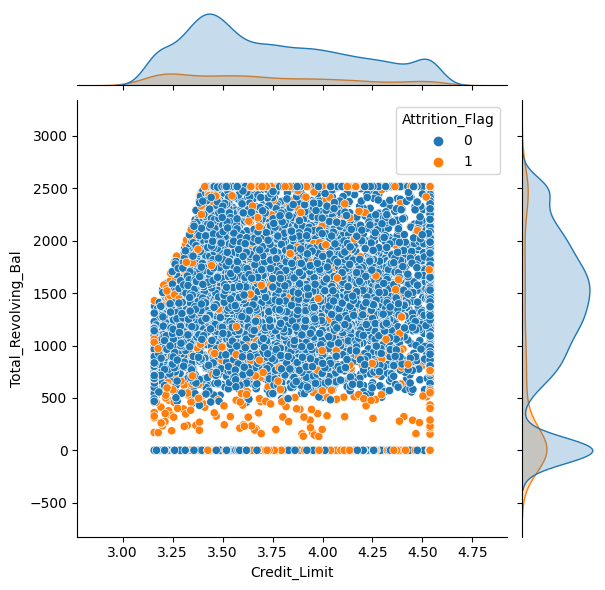

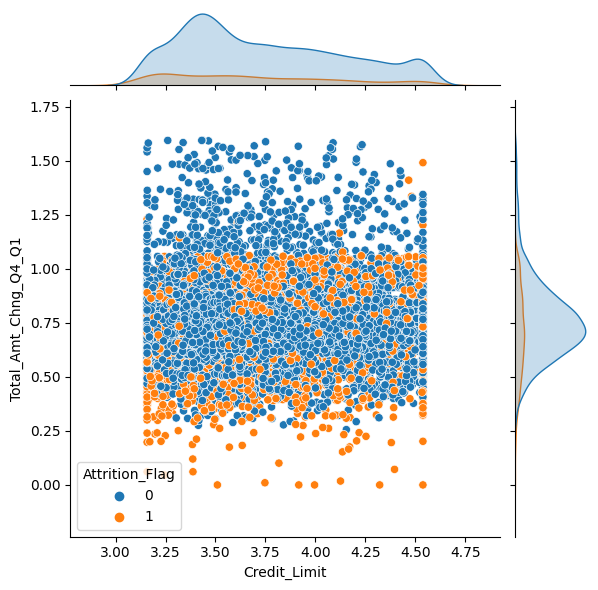

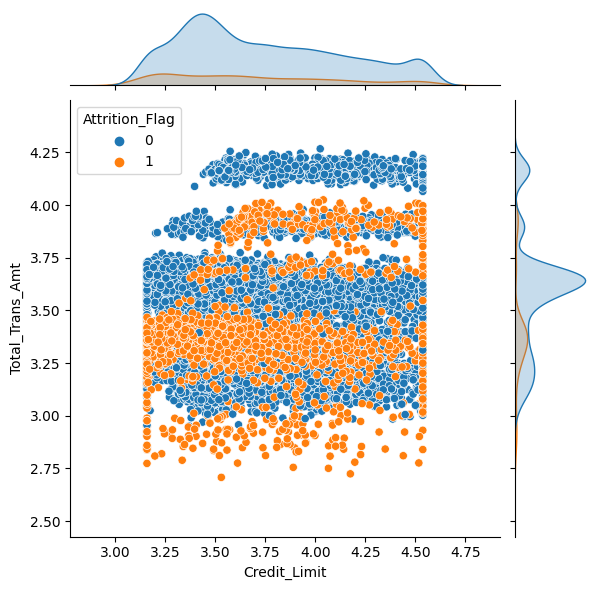

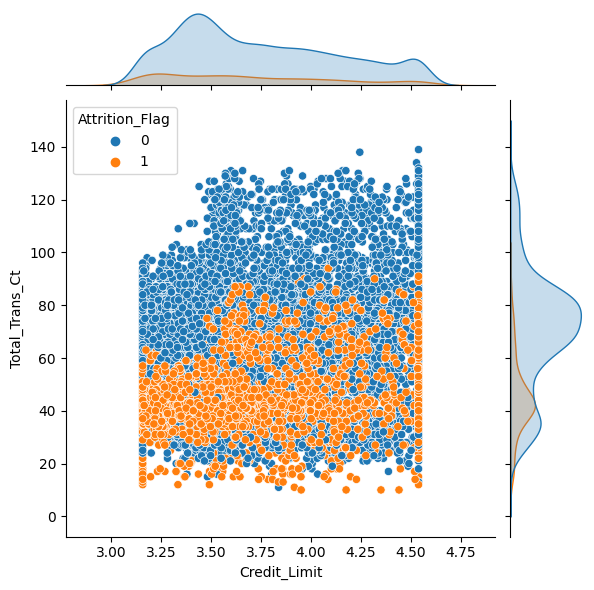

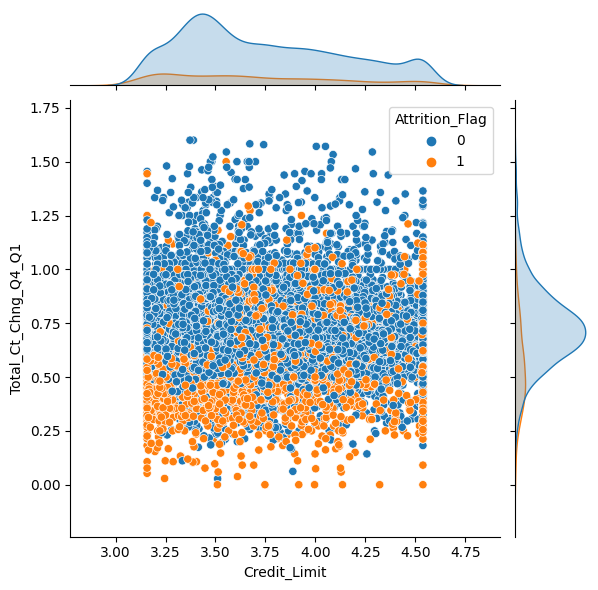

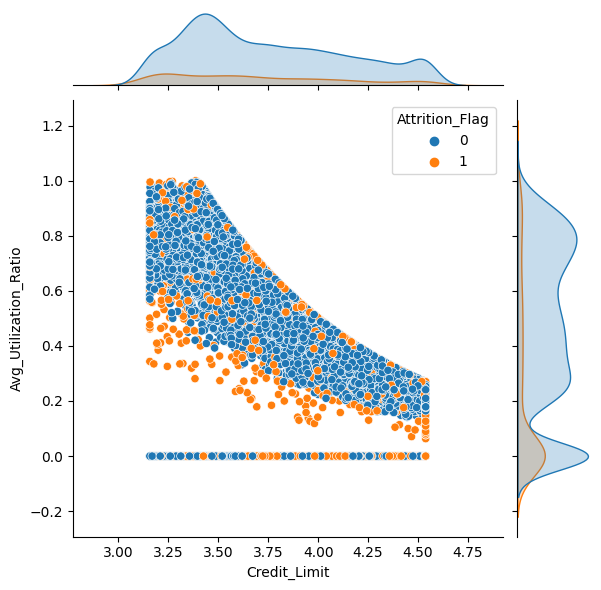

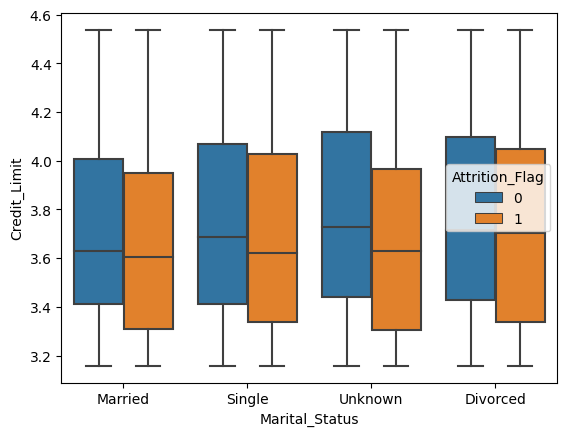

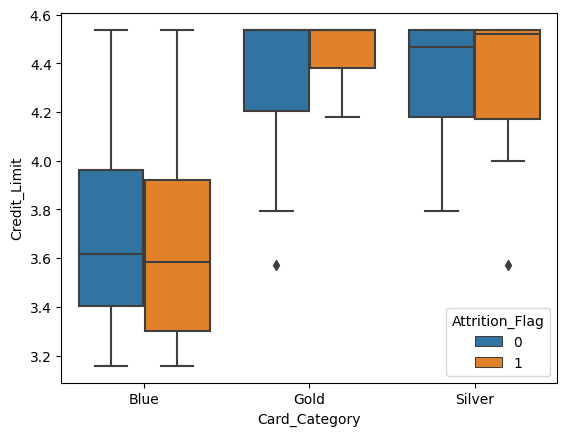

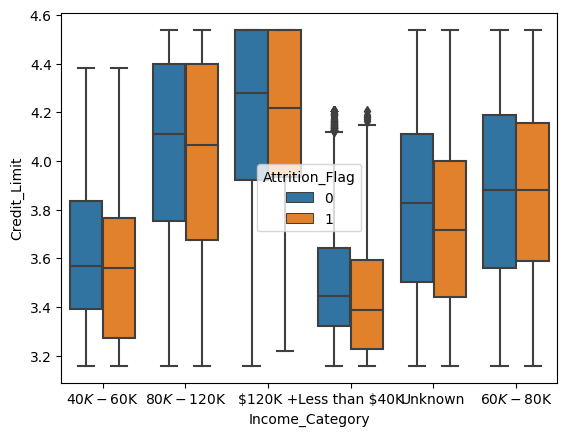

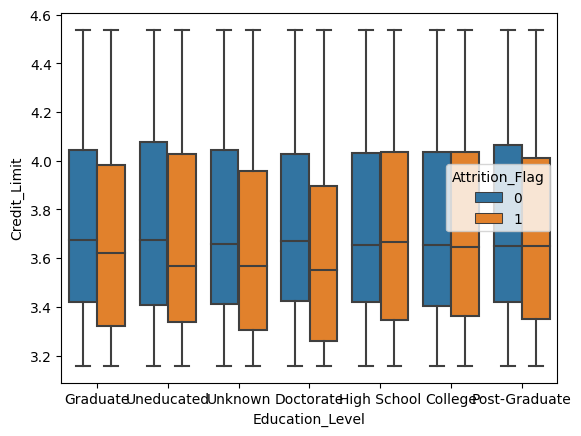

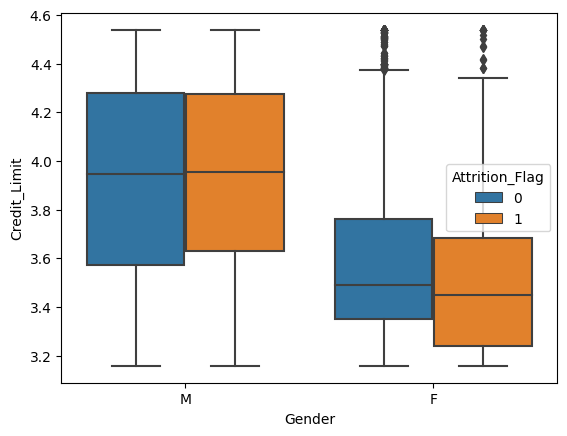

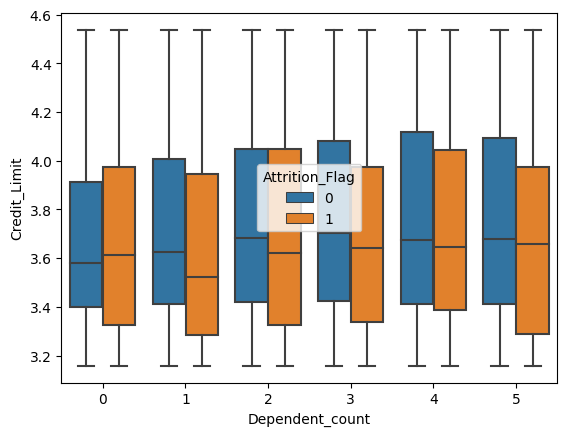

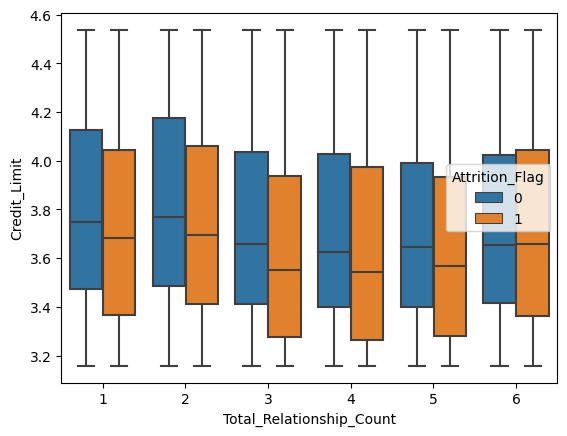

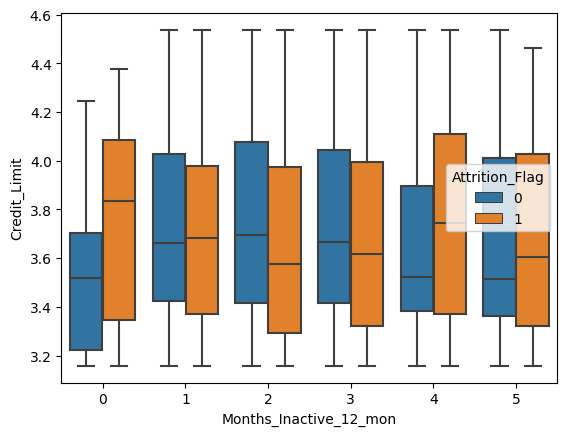

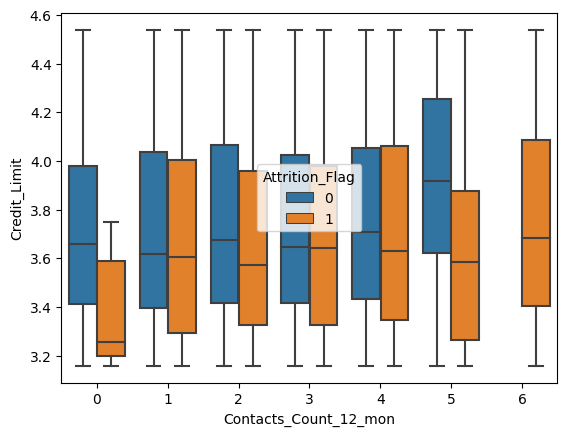

In [11]:
num_data.remove('Credit_Limit')
for i in num_data:
    sns.jointplot(data = df, x = 'Credit_Limit', y = i, hue = 'Attrition_Flag')
    plt.show()
for j in cat_data:
    sns.boxplot(data = df, x = j, y = 'Credit_Limit', hue = 'Attrition_Flag')
    plt.show()
num_data.append('Credit_Limit')

Plot Categorical Data

- Income_Category
    - คนที่มีรายได้มากกว่า 120k มี credit limit และ avg_open_to_buy สูงกว่ากลุ่มอื่นๆ
    - สังเกตเห็นถึงการแบ่งกลุ่มของ output เมื่อเทียบกับหลายข้อมูลเช่น Total_Revolving_Bal, Total_Trans_Ct, Total_Trans_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio


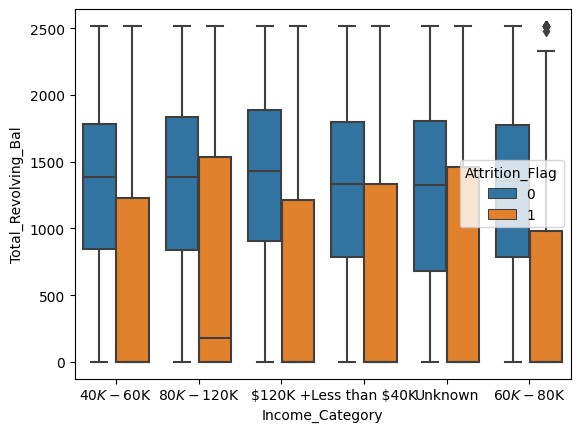

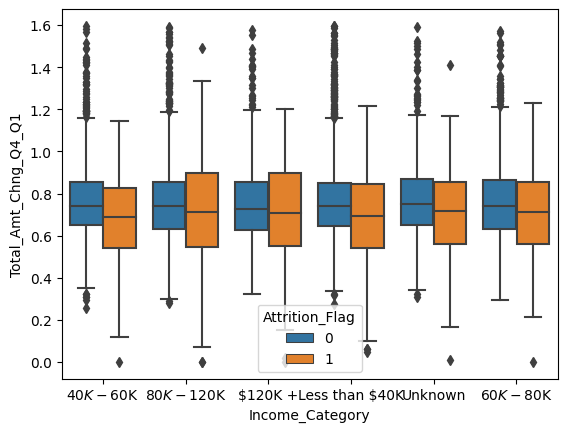

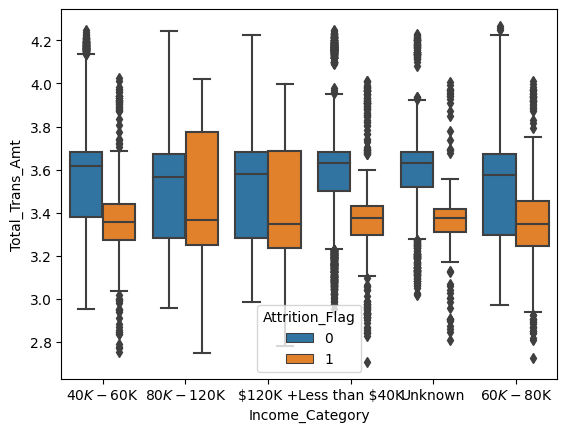

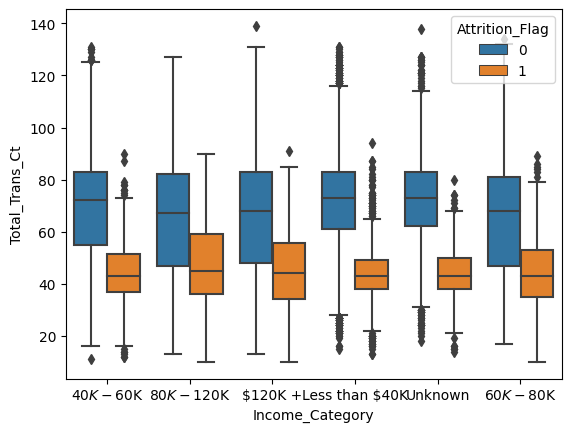

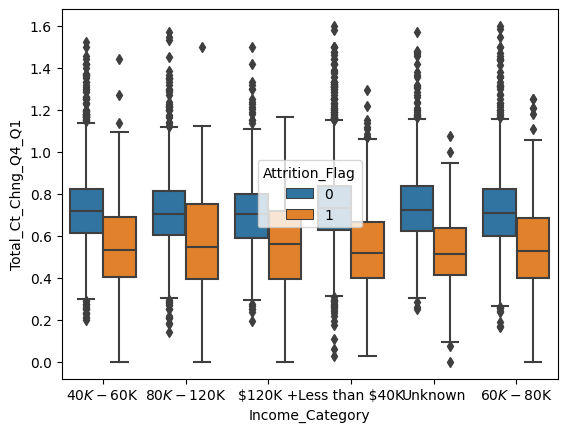

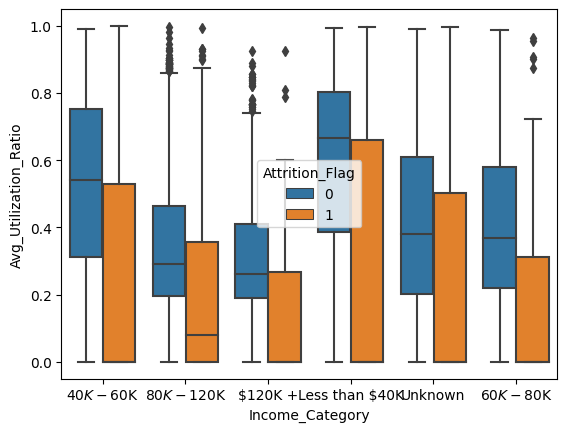

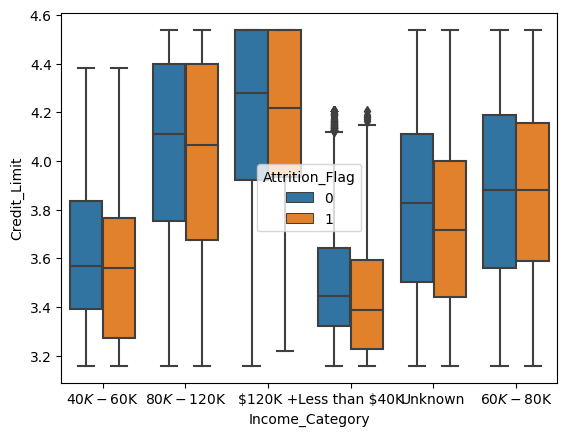

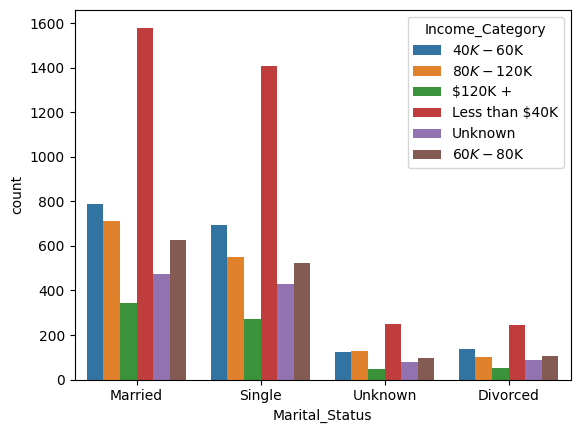

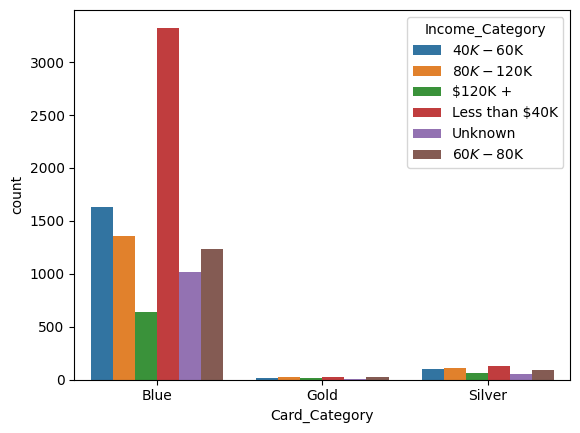

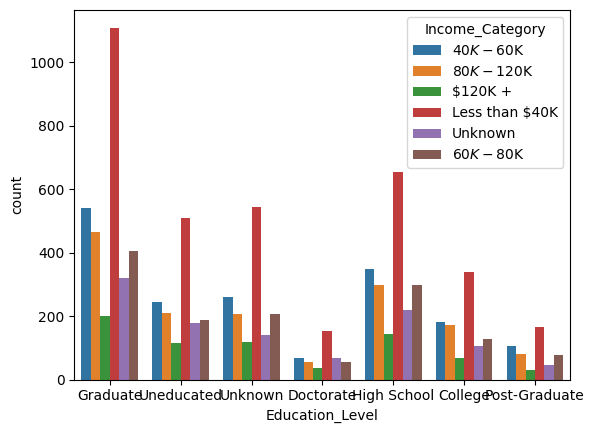

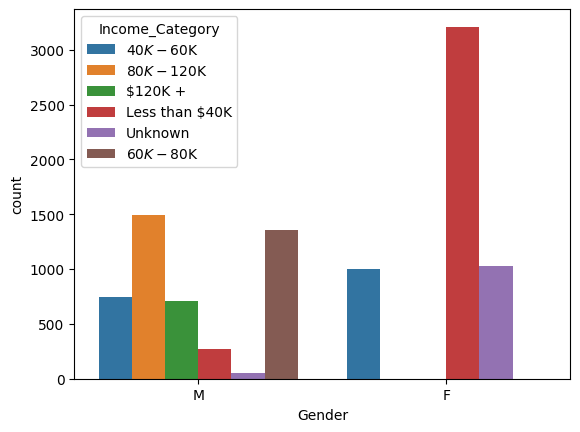

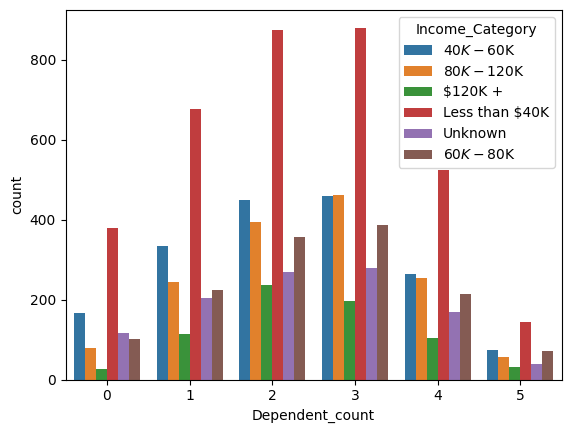

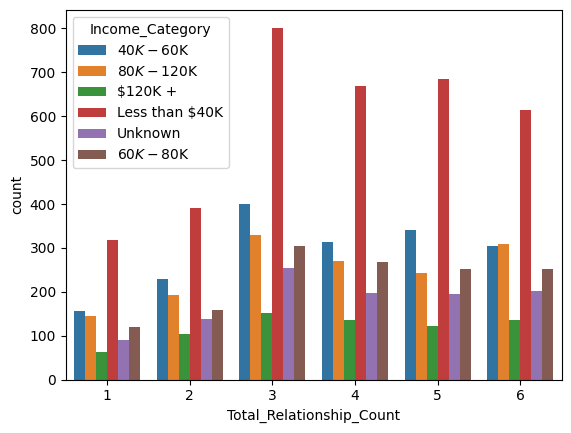

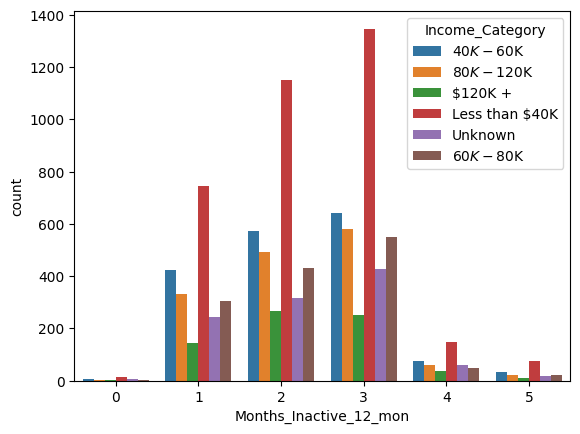

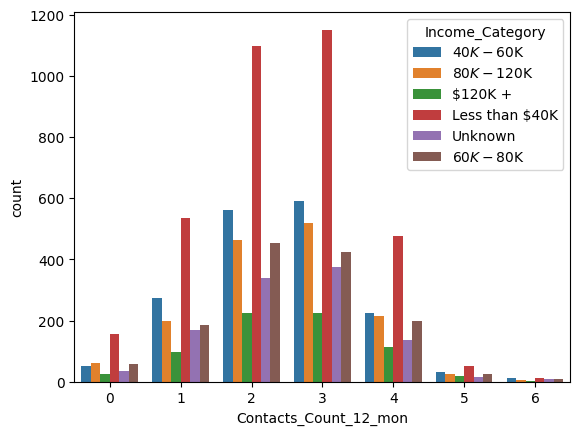

In [12]:
for i in num_data:
    sns.boxplot(data=df, x='Income_Category', y= i, hue = 'Attrition_Flag')
    plt.show()
cat_data.remove('Income_Category')
for j in cat_data:
    sns.countplot(data=df, x=j, hue="Income_Category")
    plt.show()

- Education_Level
    - สังเกตเห็นถึงการแบ่งกลุ่มของ output เมื่อเทียบกับหลายข้อมูลเช่น Total_Revolving_Bal, Total_Trans_Amt, Total_Trans_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio
    - และที่เห็นชัดเจนถึงการแบ่งกลุ่มของ Output คือเมื่อเปรียบเทียบกับ Total_Trans_Ct ข้อมูลมีการแบ่งกลุ่มอย่างชัดเจน

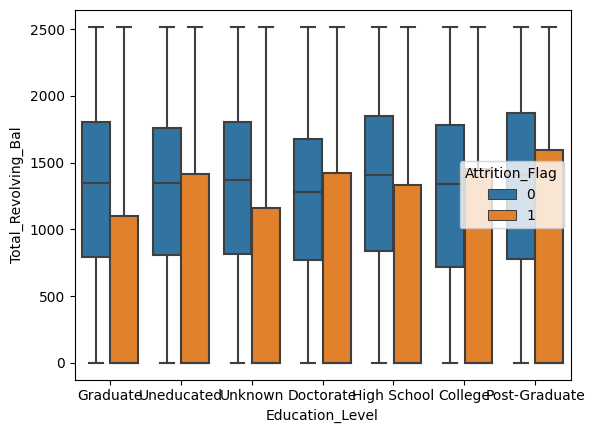

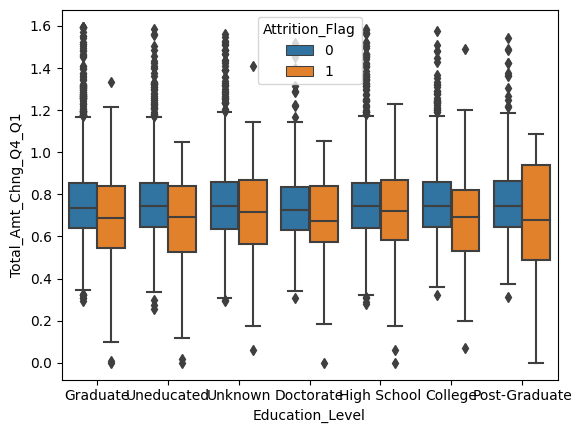

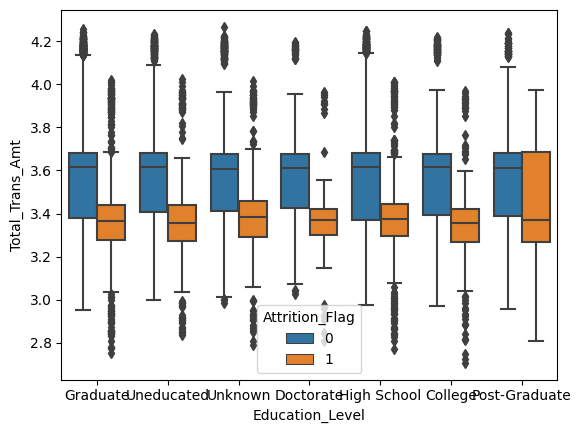

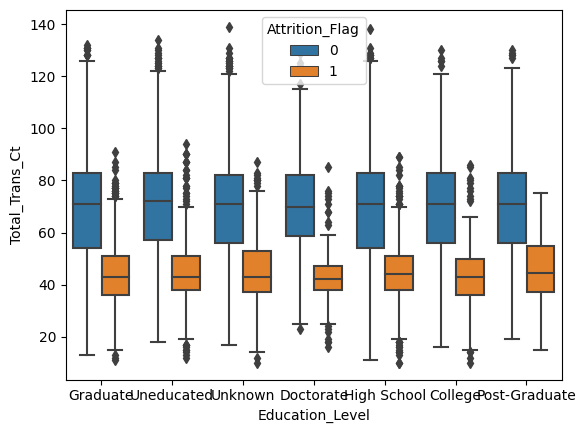

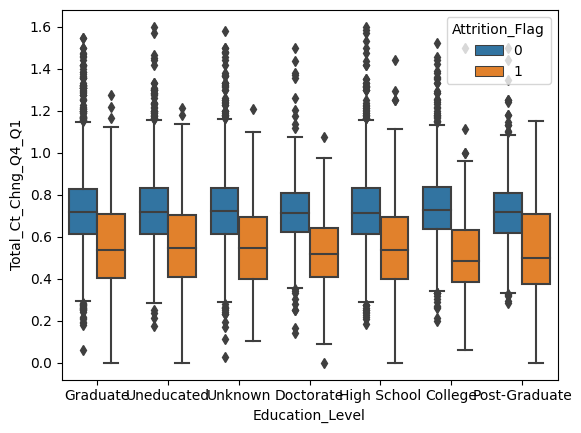

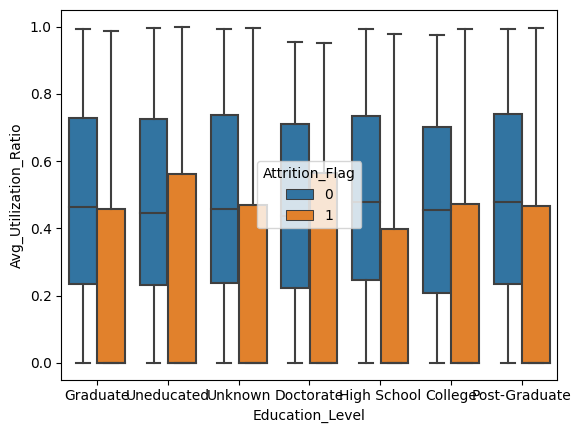

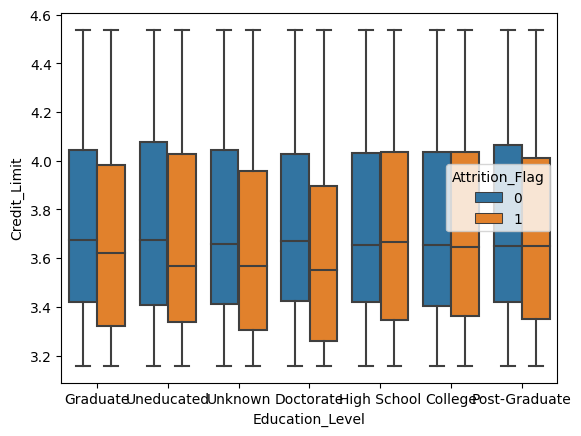

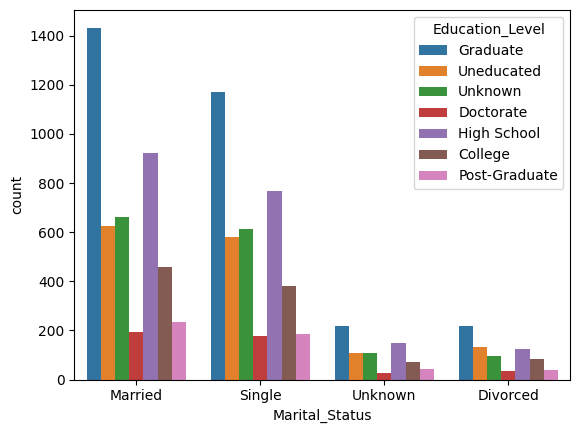

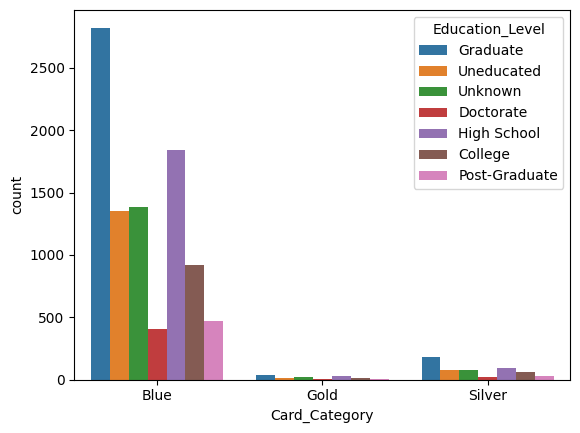

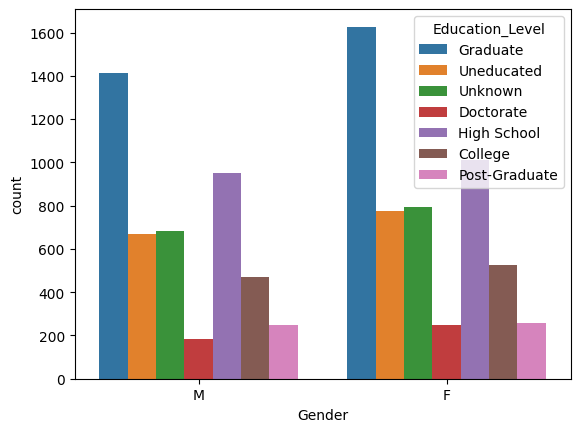

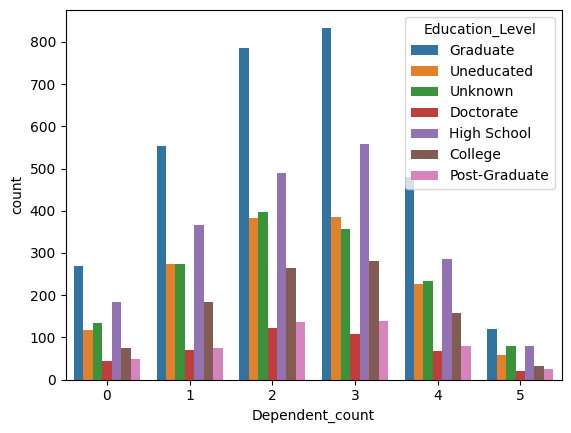

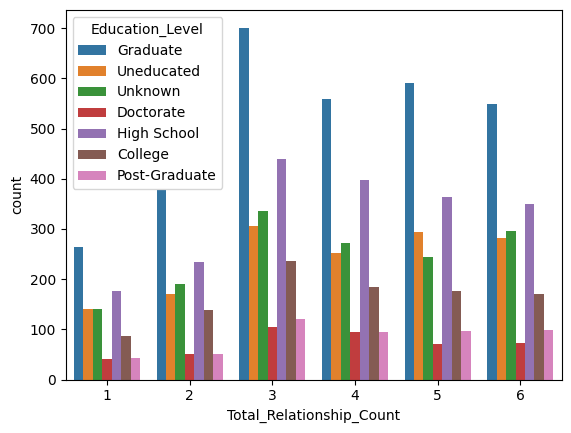

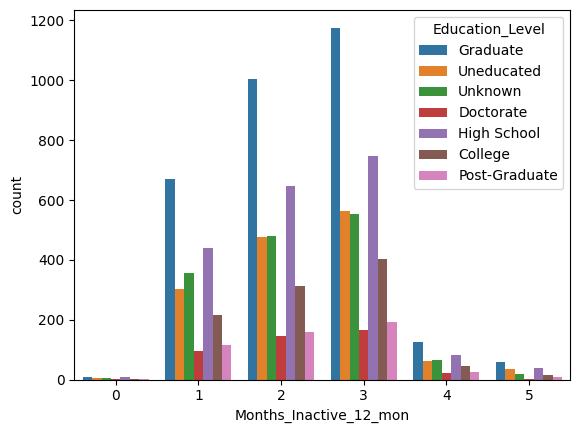

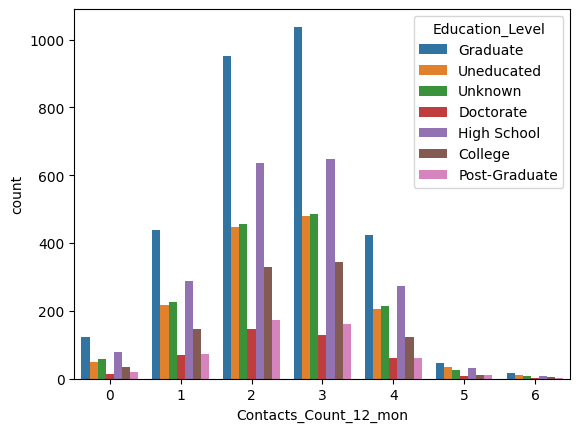

In [13]:
for i in num_data:
    sns.boxplot(data=df, x='Education_Level', y= i, hue = 'Attrition_Flag')
    plt.show()
cat_data.remove('Education_Level')
for j in cat_data:
    sns.countplot(data=df, x=j, hue="Education_Level")
    plt.show()

- Dependent_count
    - สังเกตเห็นถึงการแบ่งกลุ่มของ output เมื่อเทียบกับหลายข้อมูลเช่น Total_Revolving_Bal, Total_Trans_Ct, Total_Trans_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio

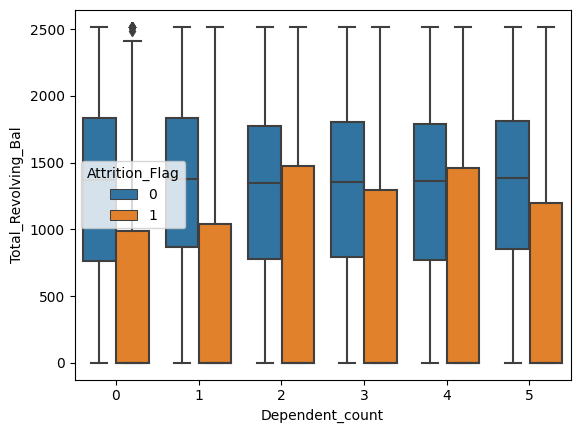

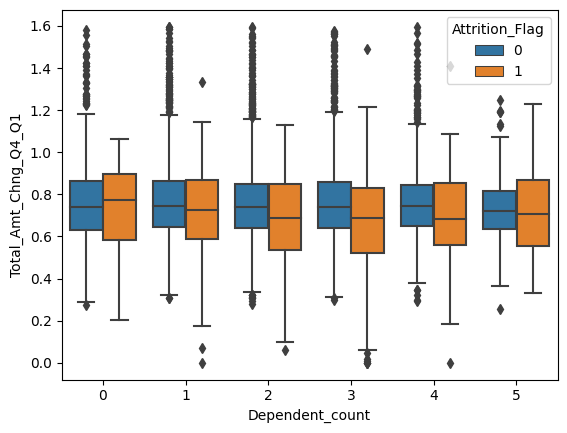

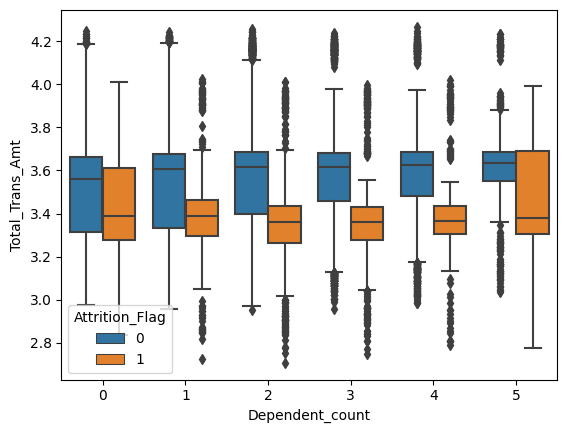

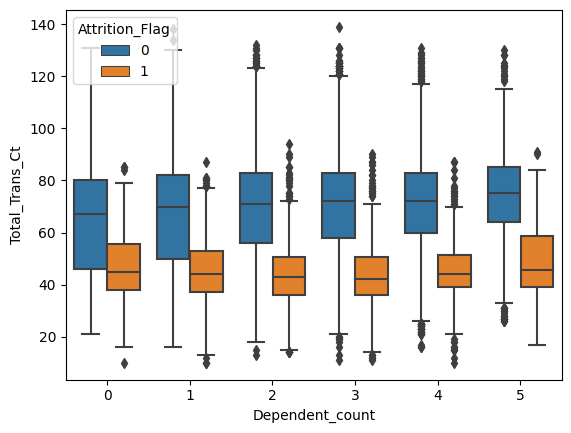

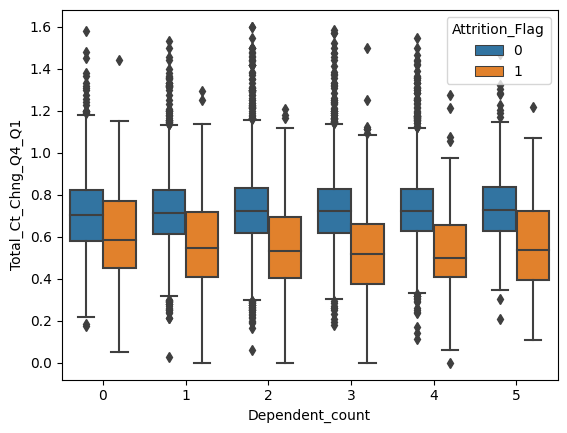

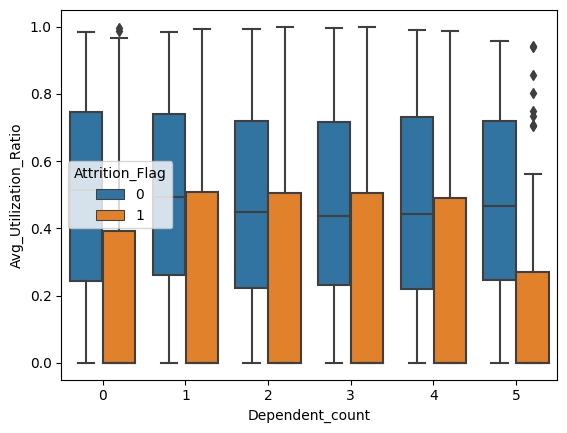

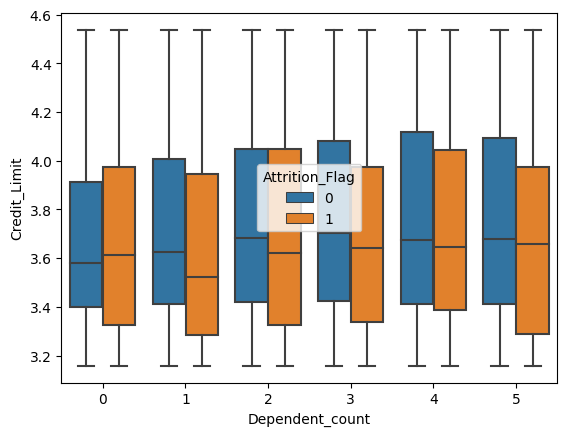

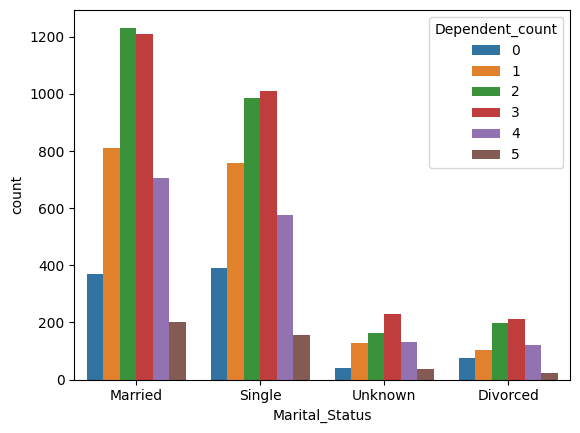

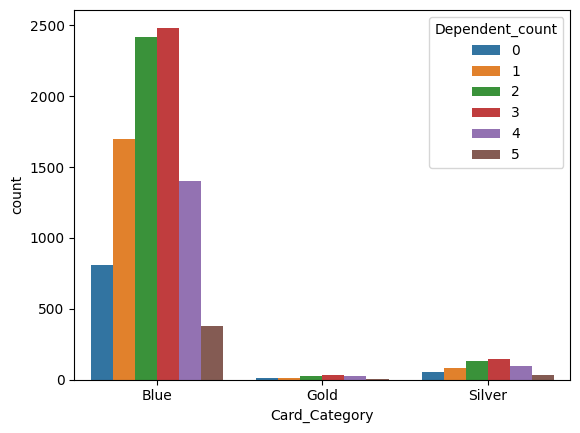

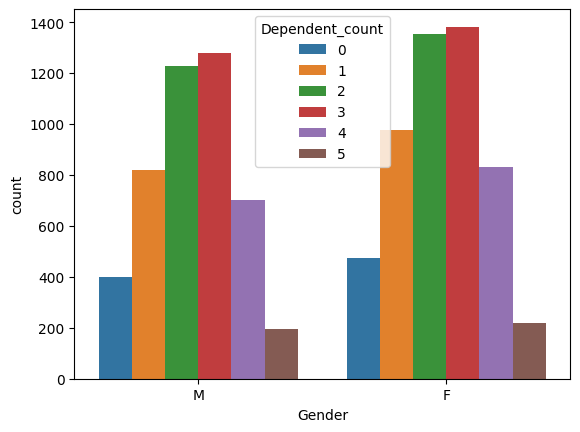

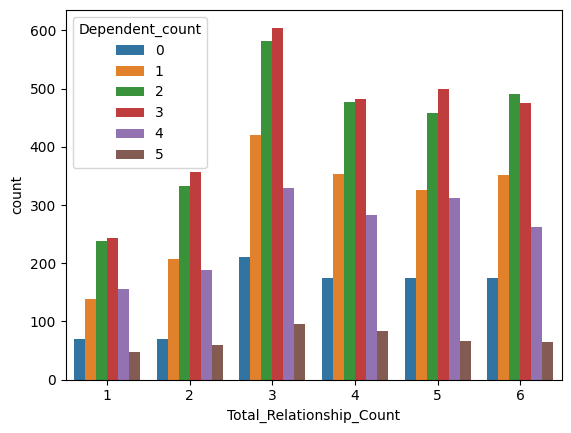

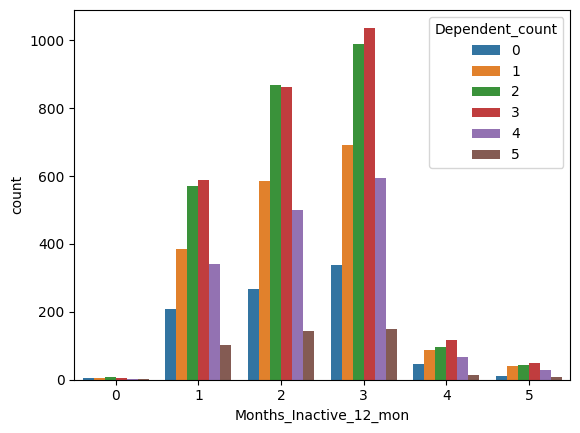

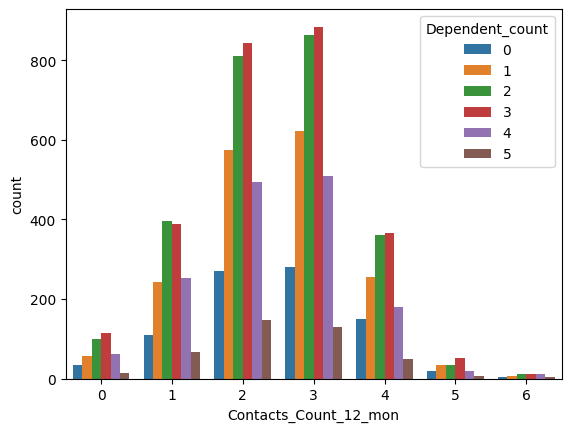

In [14]:
for i in num_data:
    sns.boxplot(data=df, x='Dependent_count', y= i, hue = 'Attrition_Flag')
    plt.show()
cat_data.remove('Dependent_count')
for j in cat_data:
    sns.countplot(data=df, x=j, hue="Dependent_count")
    plt.show()

- Marital_Status
    - แสดงถึงการแบ่งกลุ่มของ Output เมื่อเทียบกับ Total_Trans_Amt, Total_Trans_Ct ในกลุ่มคนที่ไม่ได้มีสถานภาพแต่งงาน และมีช่วงของข้อมูลที่แบ่งได้ชัดกว่าข้อมูลอื่นๆ

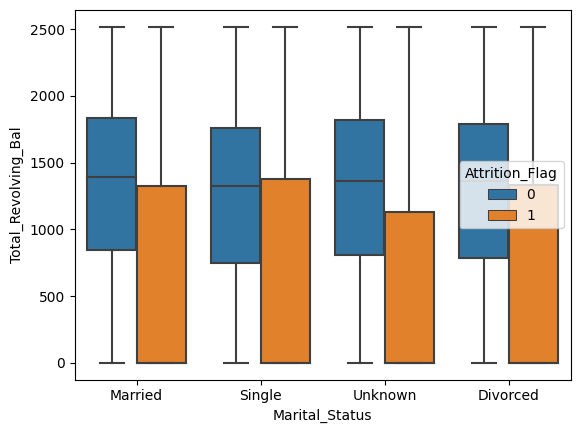

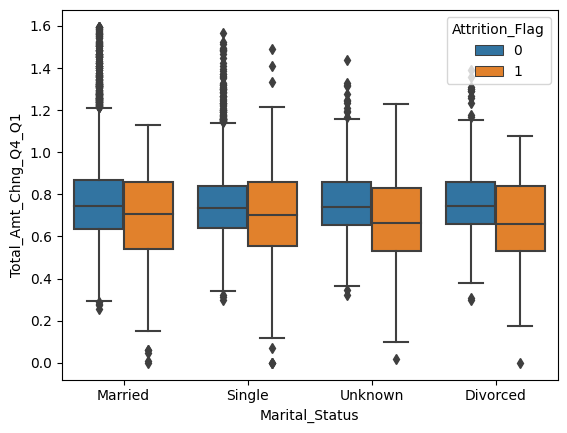

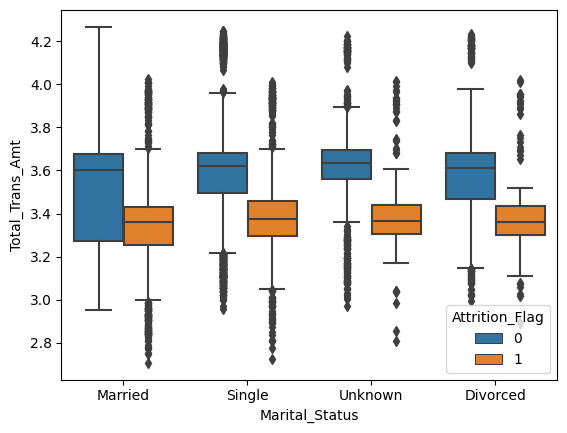

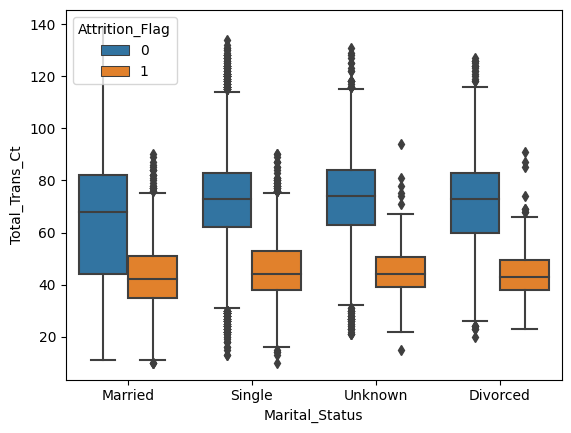

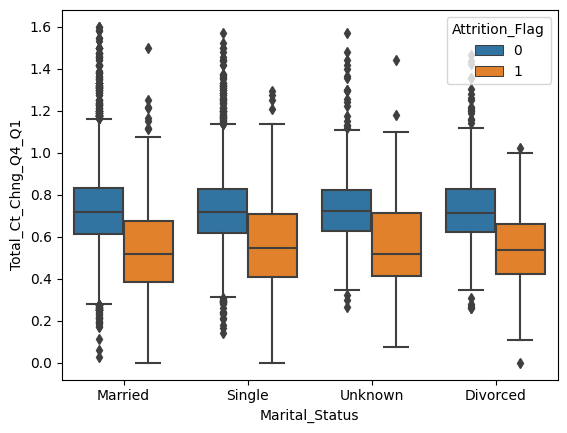

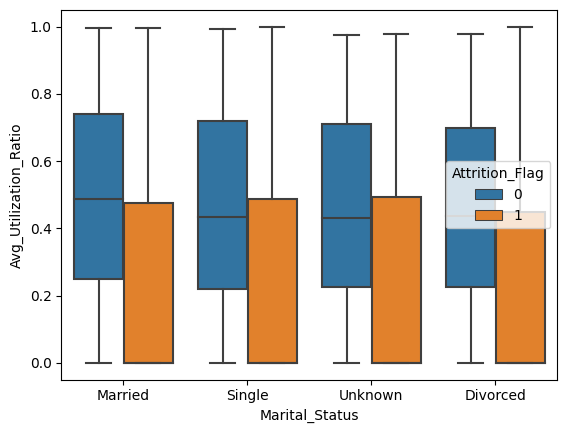

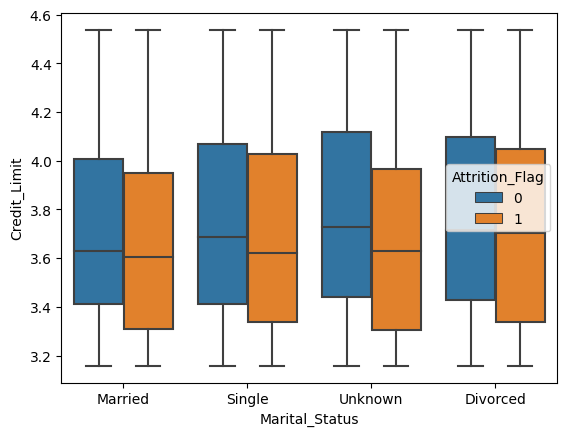

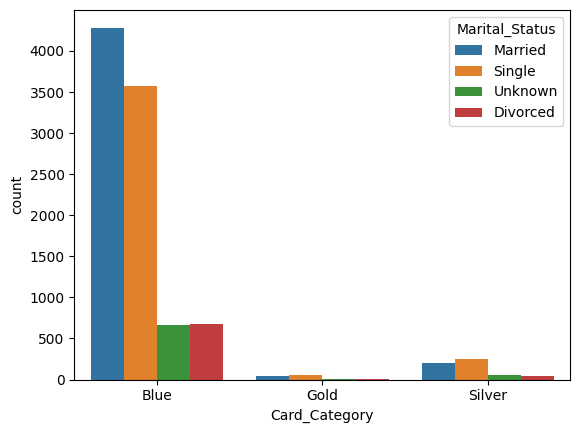

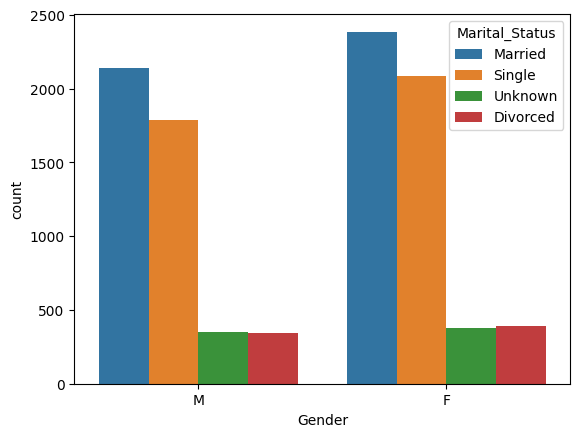

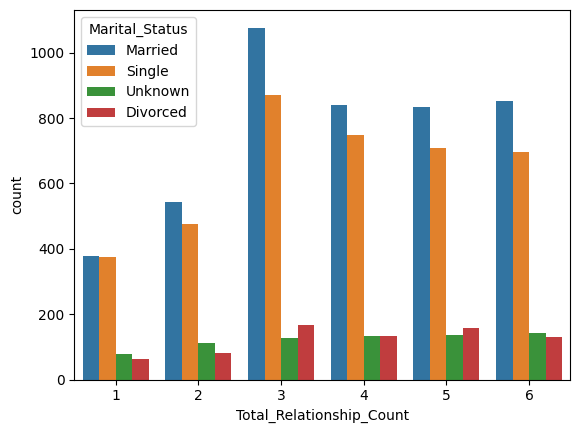

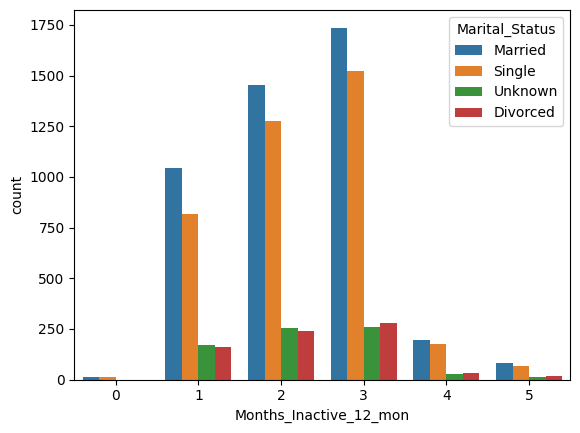

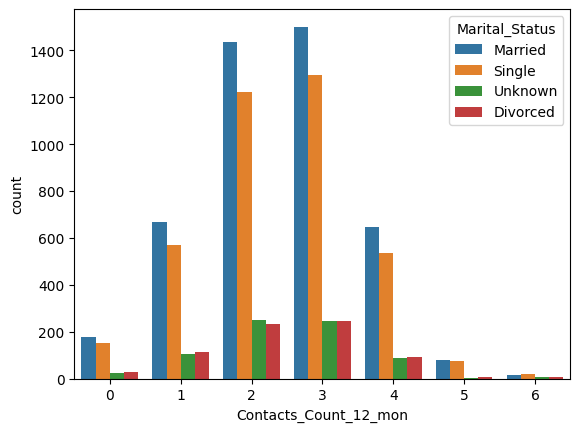

In [15]:
for i in num_data:
    sns.boxplot(data=df, x='Marital_Status', y= i, hue = 'Attrition_Flag')
    plt.show()
cat_data.remove('Marital_Status')
for j in cat_data:
    sns.countplot(data=df, x=j, hue="Marital_Status")
    plt.show()

- Gender
    - ความสัมพันธุ์ของข้อมูลเทียบกับ Output เห็นการแบ่งกลุ่มในเพศหญิงแต่ในเพศชายยังคงมีความซ้อนทับกันอยู่มาก

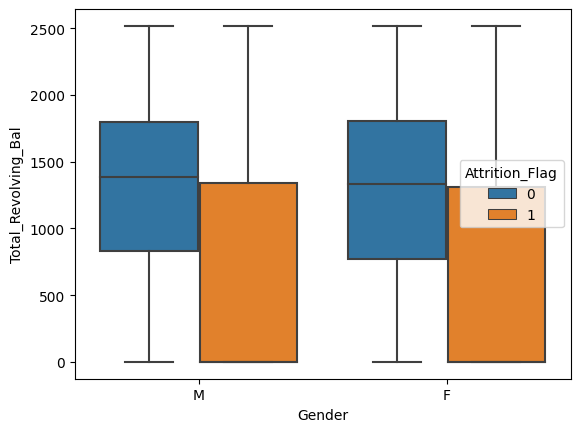

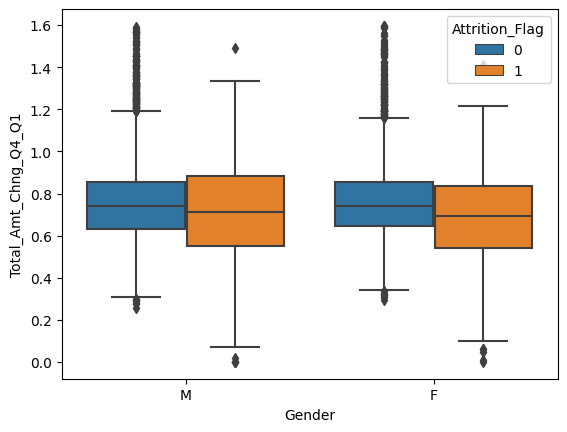

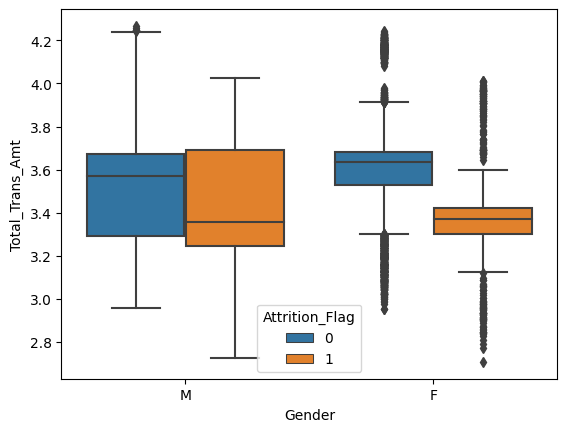

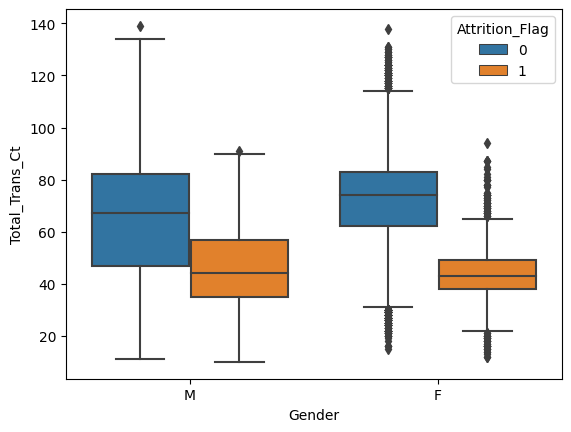

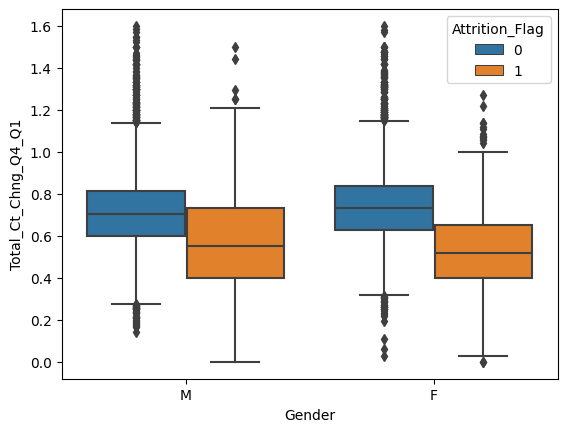

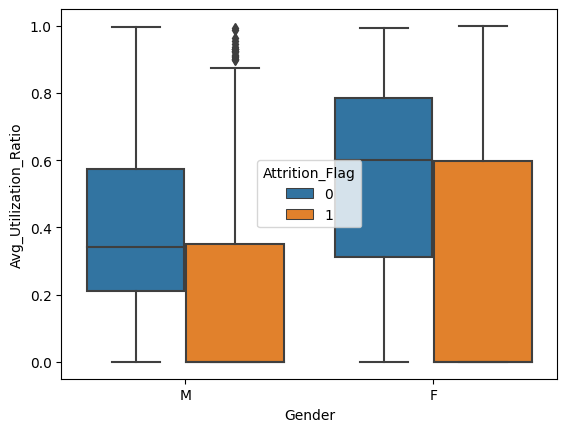

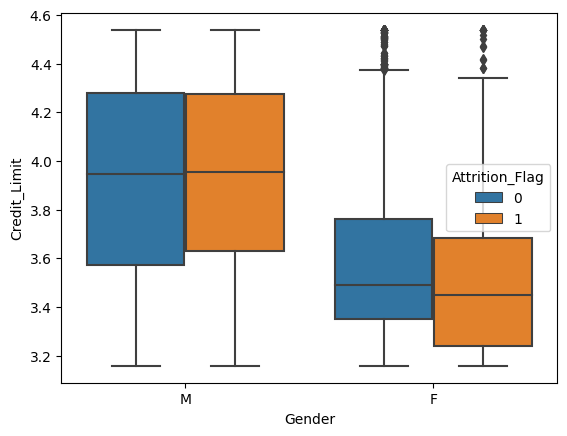

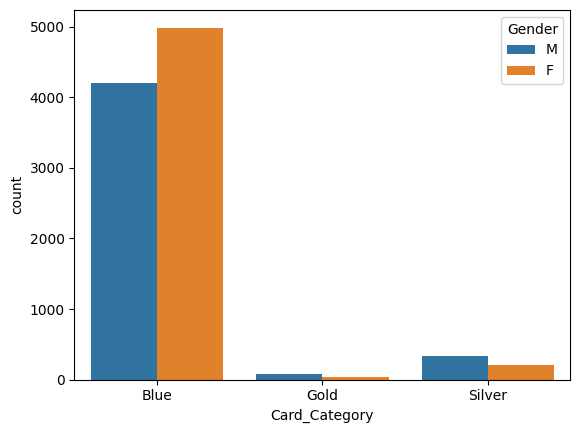

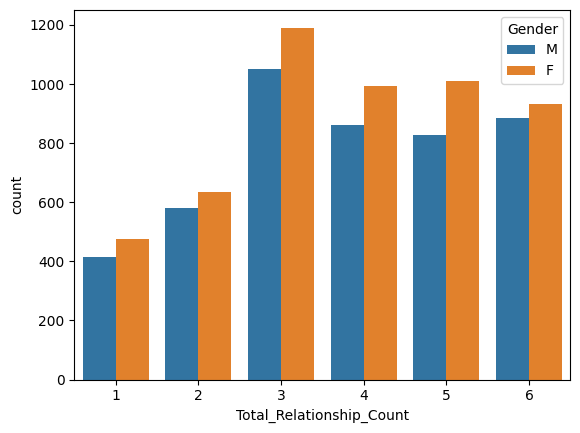

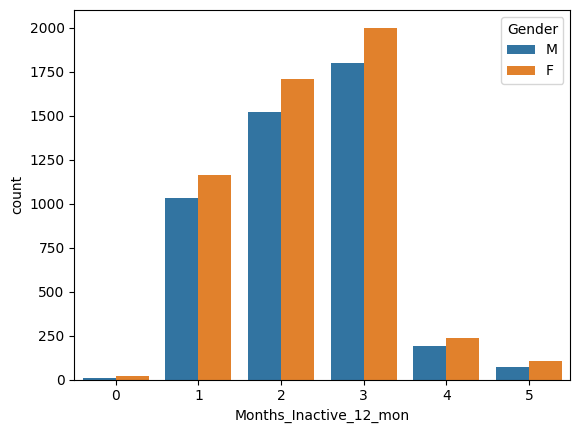

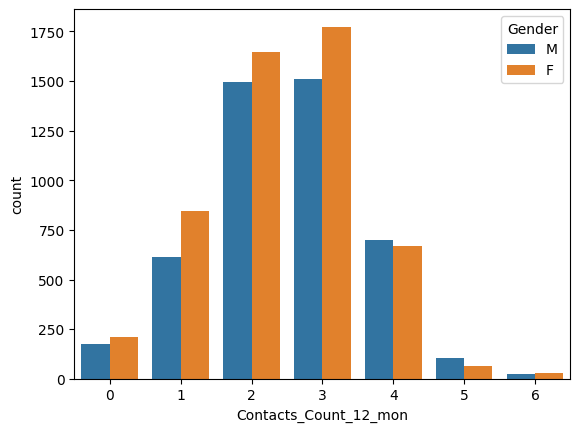

In [16]:
for i in num_data:
    sns.boxplot(data=df, x='Gender', y= i, hue = 'Attrition_Flag')
    plt.show()
cat_data.remove('Gender')
for j in cat_data:
    sns.countplot(data=df, x=j, hue="Gender")
    plt.show()

- Card Category
    - จากกราฟทั้งหมดไม่เห็นถึงการแบ่งกลุ่มของข้อมูล Output ที่ชัดเจนจึงทำให้เลือกพิจารณาตัดข้อมูลทิ้ง

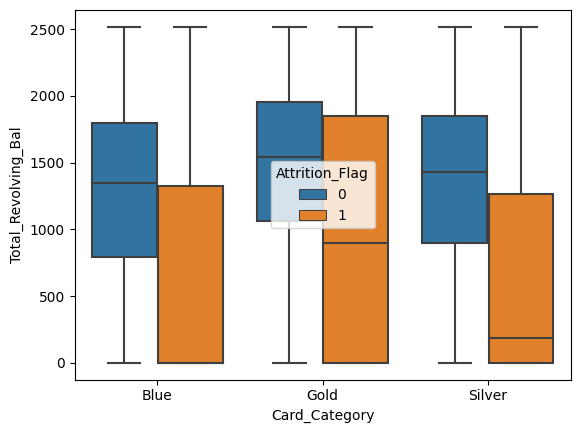

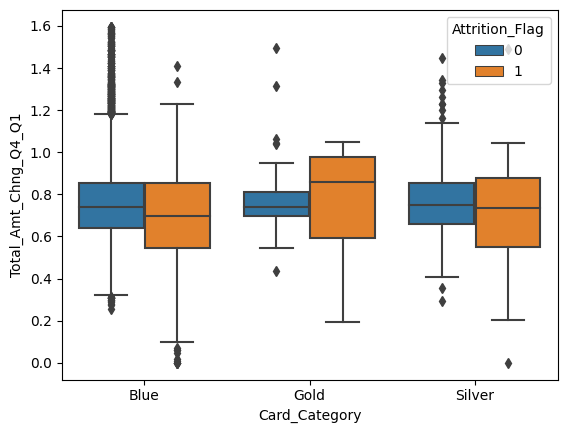

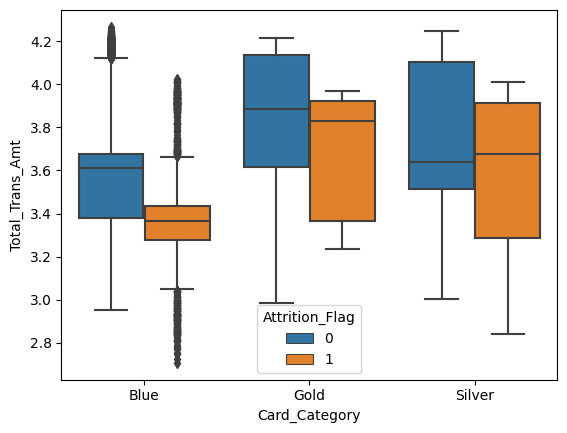

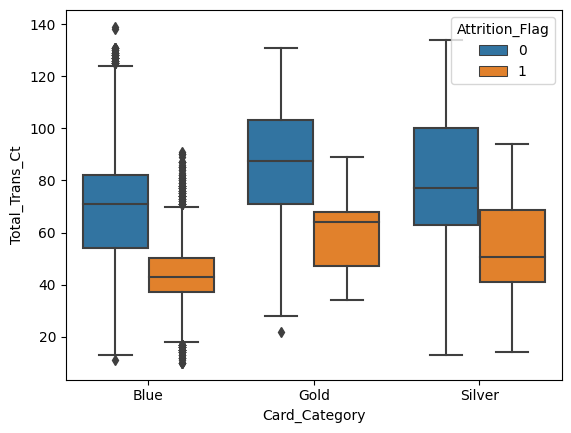

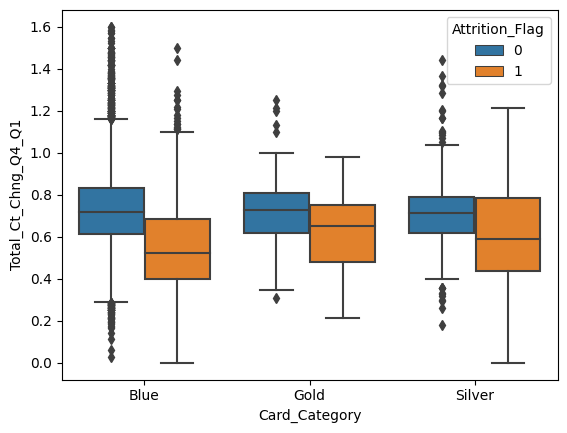

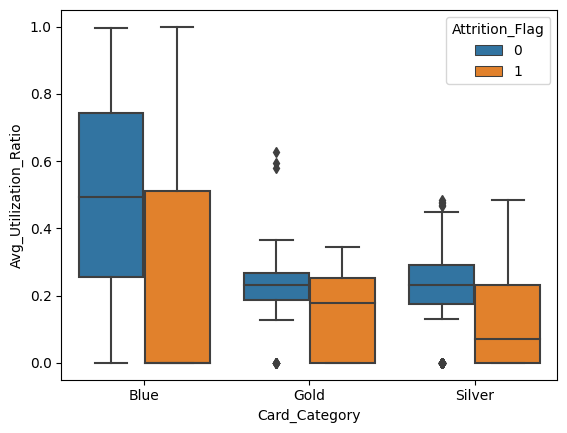

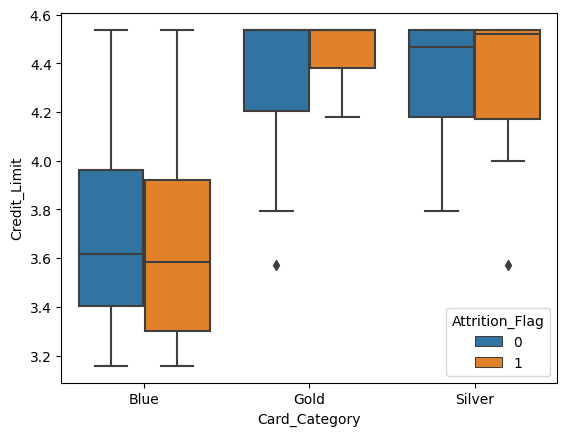

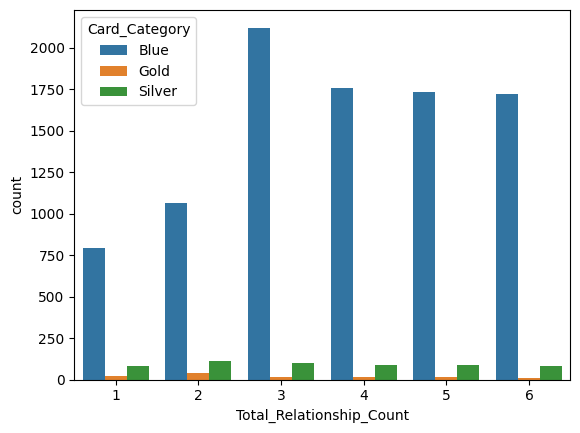

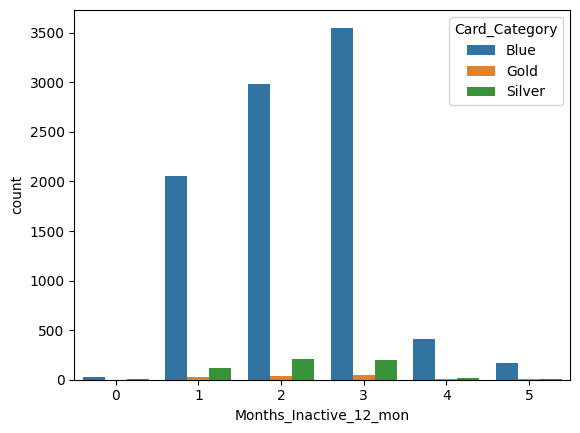

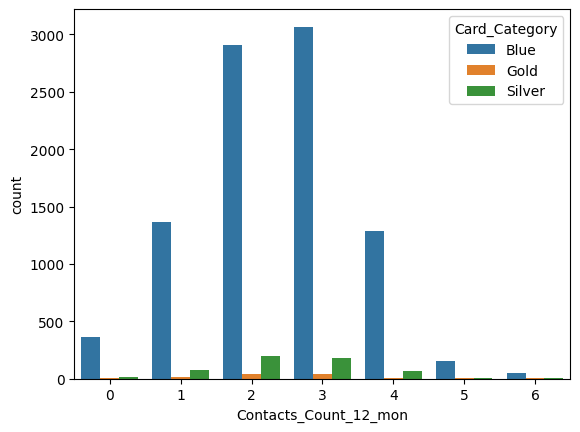

In [17]:
for i in num_data:
    sns.boxplot(data=df, x='Card_Category', y= i, hue = 'Attrition_Flag')
    plt.show()
cat_data.remove('Card_Category')
for j in cat_data:
    sns.countplot(data=df, x=j, hue="Card_Category")
    plt.show()
df = df.drop(['Card_Category'], axis = 1)

Plot Heatmap สำหรับข้อมูล Categorical ที่เหลือ
- ฟีเจอร์ที่เห็นได้ชัดว่ามีความสัมพันธุ์กับข้อมูลอื่นจำนวนมากคือ Gender จึงเลือกที่จะตัดทิ้ง
- ส่วนข้อมูล Credit_Limit และ Avg_Utilization_Ratio มีความสัมพันธุ์กับข้อมูลอื่นโดยรวมจึงพิจารณาตัดออก

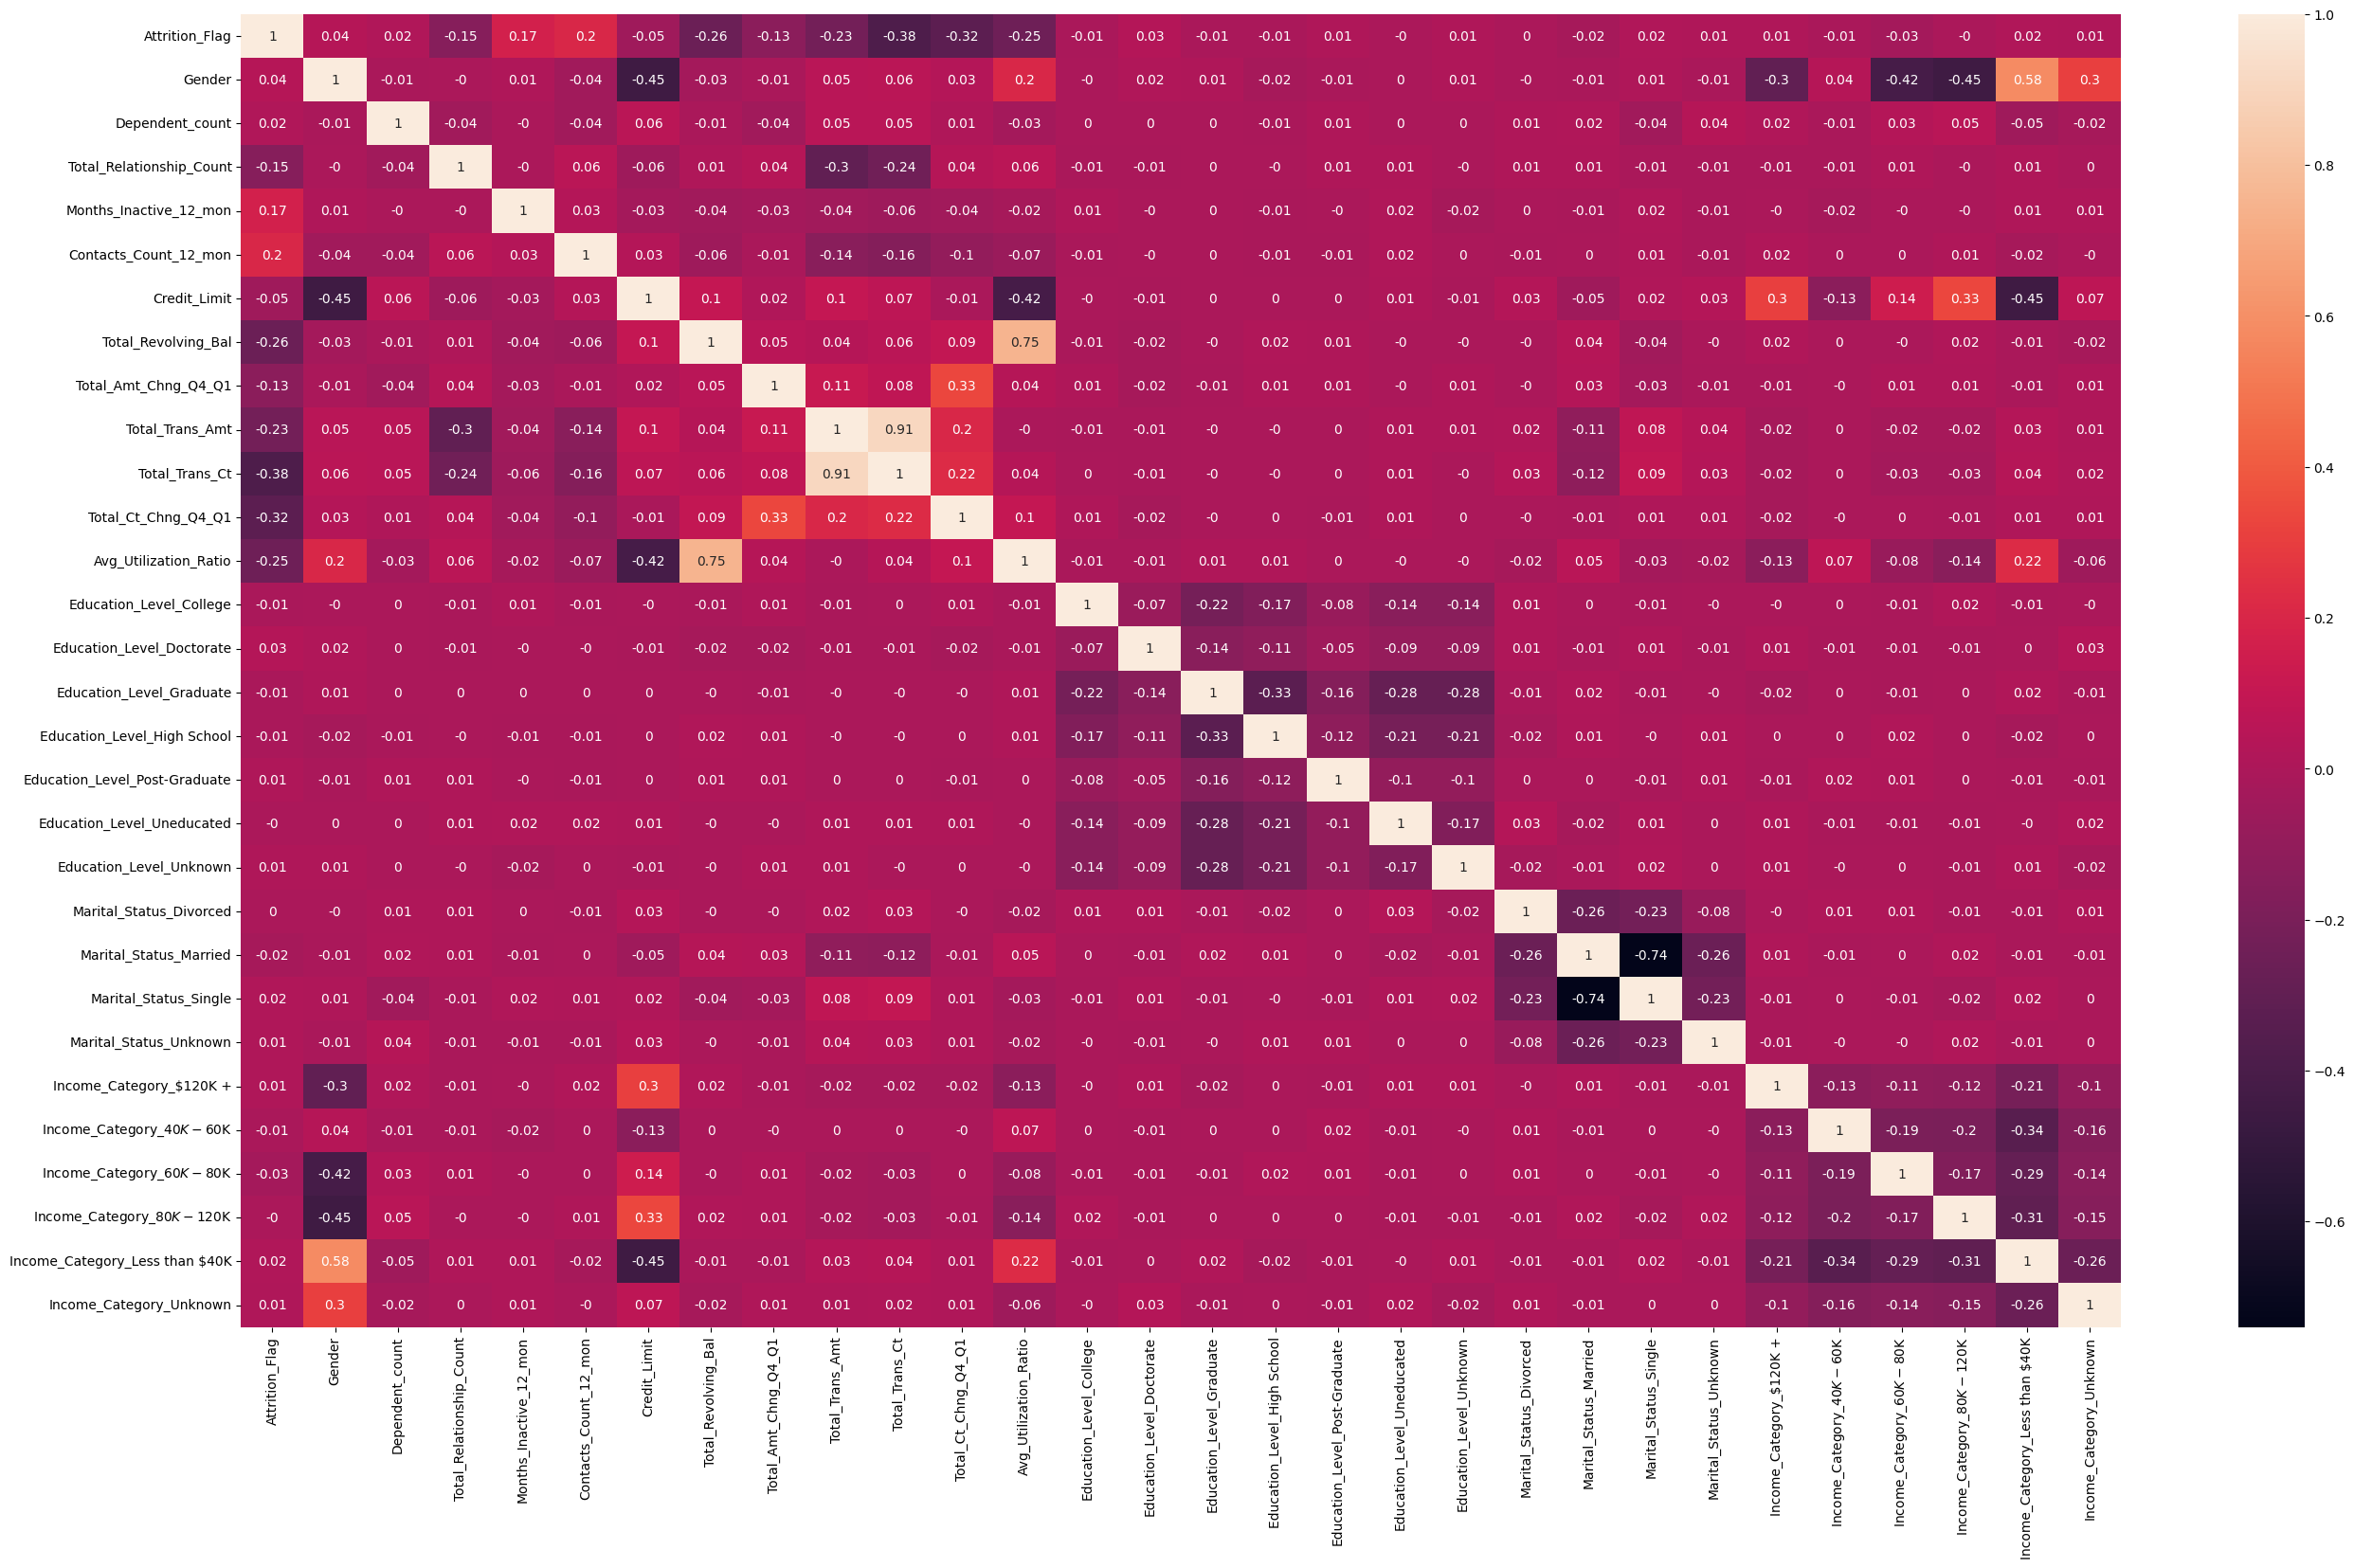

In [18]:
df['Gender'] = df['Gender'].replace(['M', 'F'], [0, 1])
df = pd.get_dummies(df)
plt.figure(figsize = (32,18))
sns.heatmap(round(df.corr(),2),annot=True)
plt.show()

สรุป Feature ที่ทำการตัดทั้งหมดจากการ exploring data
- Card_Category
- Avg_Open_To_Buy
- Months_on_book
- Customer_Age
- Gender
- Credit_Limit
- Avg_Utilization_Ratio

##### Data Preprocessing

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

def preprocessData(lst):
    ##### import dataset
    df = pd.read_csv('credit_card_churn.csv')
    df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'CLIENTNUM'], axis=1)
    ##### remove outlier
    df = df.loc[df['Customer_Age'] <= 66]
    df = df.loc[df['Total_Ct_Chng_Q4_Q1'] <= 1.6]
    df = df.loc[df['Months_Inactive_12_mon'] < 6]
    df = df.loc[df['Total_Amt_Chng_Q4_Q1'] <= 1.6]

    ##### correct skewed data
    df['Credit_Limit'] = np.log10(df['Credit_Limit'])
    fitted_data, fitted_lambda = stats.boxcox(df['Avg_Open_To_Buy'])
    df['Avg_Open_To_Buy'] = fitted_data
    df['Total_Trans_Amt'] = np.log10(df['Total_Trans_Amt'])
    df['Avg_Utilization_Ratio'] = (df['Avg_Utilization_Ratio'])**(1/2)

    ##### Data Selection
    df = df.drop(lst, axis = 1)

    ##### Data Preprocessing
    x = df.drop(['Attrition_Flag'], axis=1)
    y = df['Attrition_Flag']
    y = y.replace(['Existing Customer', 'Attrited Customer'], [0, 1])

    ##### Using one-hot
    x = pd.get_dummies(x)
    x = x.values
    y = y.values
    
    ##### scaling data
    scaler = MinMaxScaler()
    x = scaler.fit_transform(x)

    return x, y

##### Model Construction and Analysis

In [20]:
def trainModel(lst):
    ##### get x and y data from preprocessing
    x, y = preprocessData(lst)
    ##### Split train and test data
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.1, random_state = 1)

    ##### Declare model and model parameters
    logisReg = LogisticRegression()
    parameters = {'C':[0.01, 0.1, 1, 10, 100],
                'solver':('newton-cg', 'liblinear', 'sag', 'saga')}

    ##### Train model with gridsearchCV and split k-fold = 10
    clf = GridSearchCV(logisReg, parameters, scoring='f1', verbose=5, return_train_score=True, n_jobs=-1, cv = 10)
    clf.fit(x_train, y_train)

    ##### Test model, visualize classification report and confusion matrix
    
    y_pred = clf.predict(x_test)
    print("Classification report \n=======================")
    print(classification_report(y_true=y_test, y_pred=y_pred))
    print("Confusion matrix \n=======================")
    #print(confusion_matrix(y_true=y_test, y_pred=y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()

    return clf

- First Model 
    - ไม่ได้ตัดข้อมูลใดๆออกจากตารางแต่มีการ preprocessing ข้อมูล

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Classification report 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       823
           1       0.83      0.66      0.73       165

    accuracy                           0.92       988
   macro avg       0.88      0.82      0.84       988
weighted avg       0.92      0.92      0.92       988

Confusion matrix 


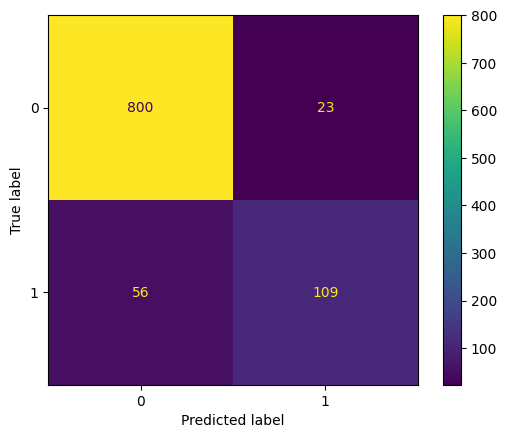

In [21]:
model1drop_list = []
model1 = trainModel(model1drop_list)

- Second Model <br>

    - เลือกตัดข้อมูลที่ list เอาไว้จากการ explore data ซึ่งได้แก่ <br>
    
        - Card_Category
        - Avg_Open_To_Buy
        - Months_on_book
        - Customer_Age
        - Gender
        - Credit_Limit
        - Avg_Utilization_Ratio

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Classification report 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       823
           1       0.83      0.63      0.72       165

    accuracy                           0.92       988
   macro avg       0.88      0.80      0.83       988
weighted avg       0.91      0.92      0.91       988

Confusion matrix 


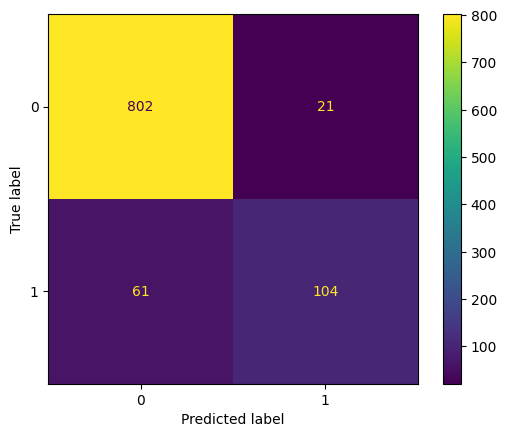

In [22]:
model2drop_list = ['Card_Category', 'Avg_Open_To_Buy', 'Months_on_book', 'Customer_Age', 'Gender', 'Credit_Limit', 'Avg_Utilization_Ratio']
model2 = trainModel(model2drop_list)

- Thrid Model <br>

    - จากโมเดลที่ 2 หรือโมเดลที่เทรนจากการทำ feature selection พบว่ามี recall และ f1-score ที่ต่ำลงจึงลองลดข้อมูลที่ทำการตัดออก 1 ข้อมูล<br>
    
        - เก็บ Avg_Open_To_Buy เอาไว้ช่วยเพิ่มประสิทธิภาพของโมเดลเพิ่มเติมจากโมเดลที่ 2 โดยที่ recall เพิ่ม 1%

Card_Category
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Classification report 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       823
           1       0.83      0.63      0.72       165

    accuracy                           0.92       988
   macro avg       0.88      0.80      0.83       988
weighted avg       0.91      0.92      0.91       988

Confusion matrix 


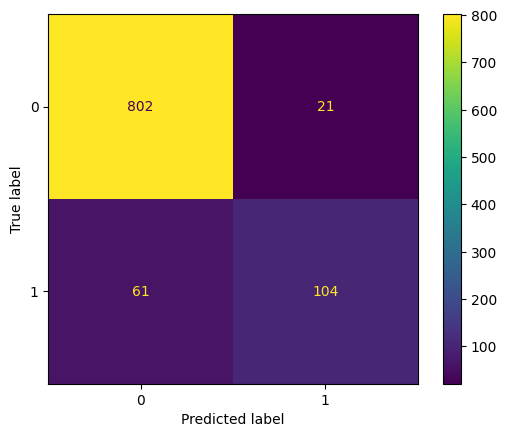

Avg_Open_To_Buy
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Classification report 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       823
           1       0.83      0.64      0.72       165

    accuracy                           0.92       988
   macro avg       0.88      0.81      0.84       988
weighted avg       0.91      0.92      0.91       988

Confusion matrix 


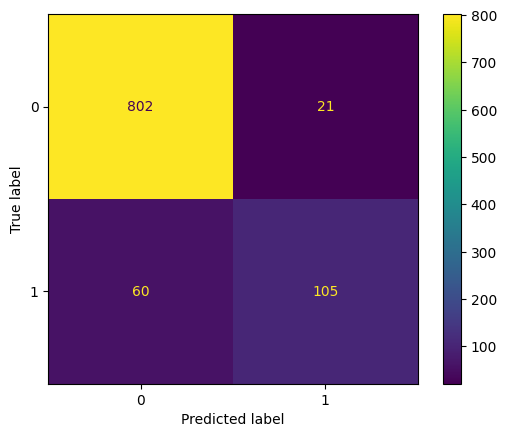

Months_on_book
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Classification report 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       823
           1       0.83      0.63      0.72       165

    accuracy                           0.92       988
   macro avg       0.88      0.80      0.83       988
weighted avg       0.91      0.92      0.91       988

Confusion matrix 


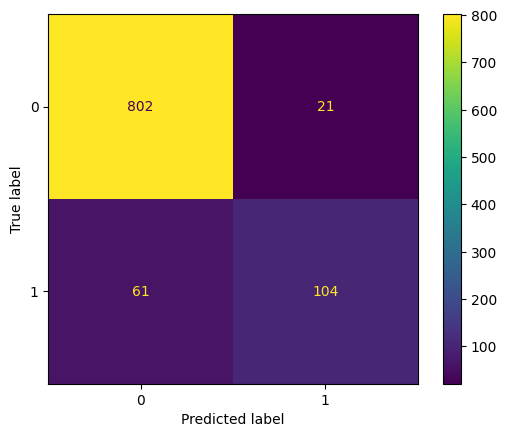

Customer_Age
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Classification report 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       823
           1       0.83      0.63      0.72       165

    accuracy                           0.92       988
   macro avg       0.88      0.80      0.83       988
weighted avg       0.91      0.92      0.91       988

Confusion matrix 


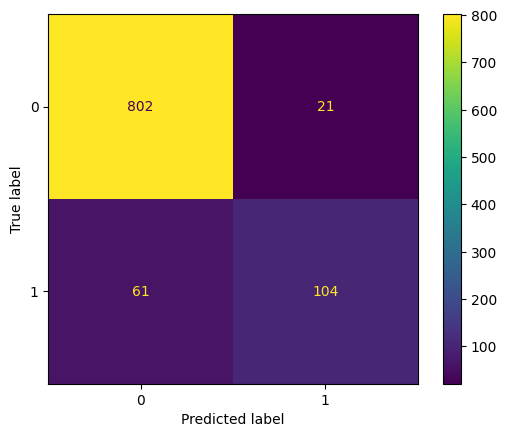

Gender
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Classification report 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       823
           1       0.81      0.63      0.71       165

    accuracy                           0.91       988
   macro avg       0.87      0.80      0.83       988
weighted avg       0.91      0.91      0.91       988

Confusion matrix 


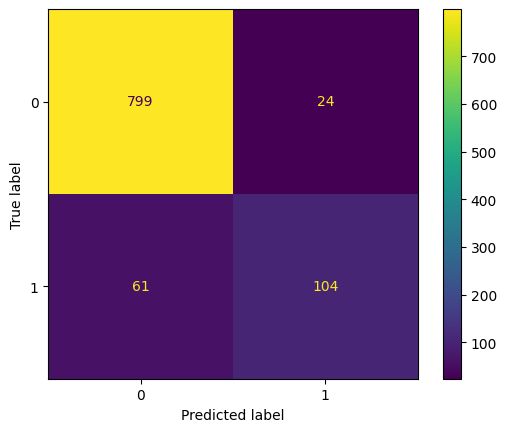

Credit_Limit
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Classification report 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       823
           1       0.83      0.63      0.71       165

    accuracy                           0.92       988
   macro avg       0.88      0.80      0.83       988
weighted avg       0.91      0.92      0.91       988

Confusion matrix 


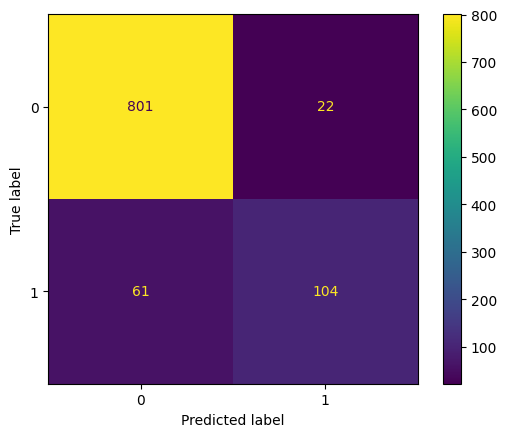

Avg_Utilization_Ratio
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Classification report 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       823
           1       0.82      0.62      0.70       165

    accuracy                           0.91       988
   macro avg       0.87      0.80      0.83       988
weighted avg       0.91      0.91      0.91       988

Confusion matrix 


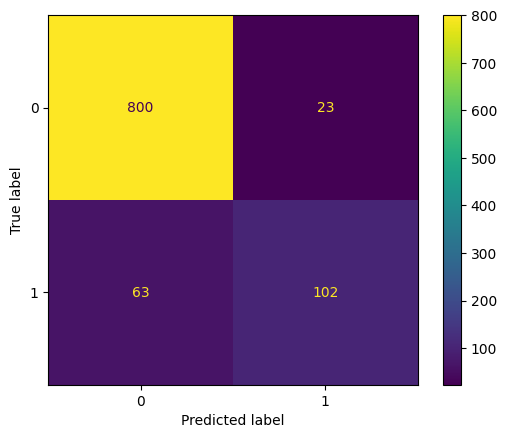

In [23]:
print('Card_Category')
model3drop_list = ['Avg_Open_To_Buy', 'Months_on_book', 'Customer_Age', 'Gender', 'Credit_Limit', 'Avg_Utilization_Ratio']
model3 = trainModel(model3drop_list)
######
print('Avg_Open_To_Buy')
model3drop_list = ['Card_Category', 'Months_on_book', 'Customer_Age', 'Gender', 'Credit_Limit', 'Avg_Utilization_Ratio']
model3 = trainModel(model3drop_list)
######
print('Months_on_book')
model3drop_list = ['Card_Category', 'Avg_Open_To_Buy', 'Customer_Age', 'Gender', 'Credit_Limit', 'Avg_Utilization_Ratio']
model3 = trainModel(model3drop_list)
######
print('Customer_Age')
model3drop_list = ['Card_Category', 'Avg_Open_To_Buy', 'Months_on_book', 'Gender', 'Credit_Limit', 'Avg_Utilization_Ratio']
model3 = trainModel(model3drop_list)
######
print('Gender')
model3drop_list = ['Card_Category', 'Avg_Open_To_Buy', 'Months_on_book', 'Customer_Age', 'Credit_Limit', 'Avg_Utilization_Ratio']
model3 = trainModel(model3drop_list)
######
print('Credit_Limit')
model3drop_list = ['Card_Category', 'Avg_Open_To_Buy', 'Months_on_book', 'Customer_Age', 'Gender', 'Avg_Utilization_Ratio']
model3 = trainModel(model3drop_list)
######
print('Avg_Utilization_Ratio')
model3drop_list = ['Card_Category', 'Avg_Open_To_Buy', 'Months_on_book', 'Customer_Age', 'Gender', 'Credit_Limit']
model3 = trainModel(model3drop_list)


- Fourth Model <br>

    - ทดลองลดข้อมูลที่ตัดออก 1 ข้อมูลจากโมเดลที่ 3<br>

        - เมื่อเก็บข้อมูล Avg_Utilization_Ratio เอาไว้พบว่าโมเดลมีประสิทธิภาพมากขึ้นทั้ง precision และ recall

Card_Category
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Classification report 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       823
           1       0.83      0.64      0.72       165

    accuracy                           0.92       988
   macro avg       0.88      0.81      0.84       988
weighted avg       0.91      0.92      0.91       988

Confusion matrix 


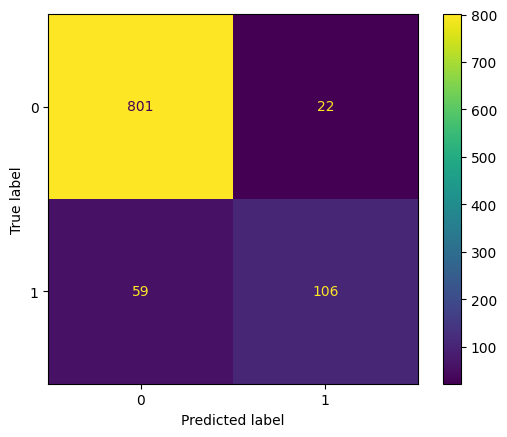

Months_on_book
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Classification report 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       823
           1       0.83      0.64      0.72       165

    accuracy                           0.92       988
   macro avg       0.88      0.81      0.84       988
weighted avg       0.91      0.92      0.91       988

Confusion matrix 


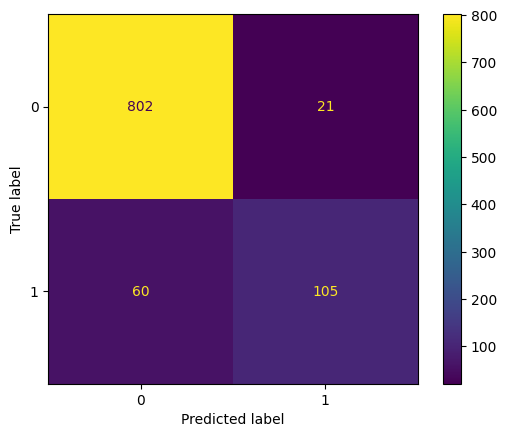

Customer_Age
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Classification report 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       823
           1       0.82      0.64      0.72       165

    accuracy                           0.92       988
   macro avg       0.88      0.80      0.83       988
weighted avg       0.91      0.92      0.91       988

Confusion matrix 


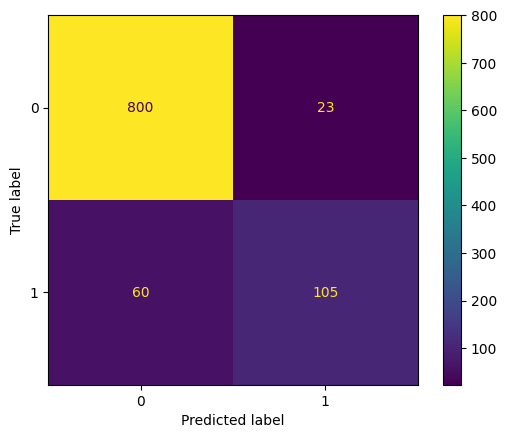

Gender
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Classification report 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       823
           1       0.82      0.63      0.71       165

    accuracy                           0.91       988
   macro avg       0.87      0.80      0.83       988
weighted avg       0.91      0.91      0.91       988

Confusion matrix 


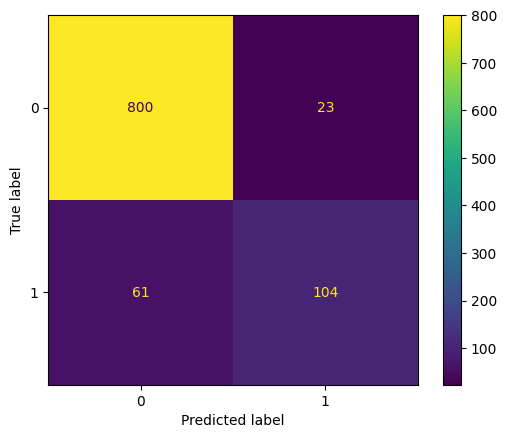

Credit_Limit
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Classification report 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       823
           1       0.83      0.64      0.72       165

    accuracy                           0.92       988
   macro avg       0.88      0.81      0.84       988
weighted avg       0.91      0.92      0.91       988

Confusion matrix 


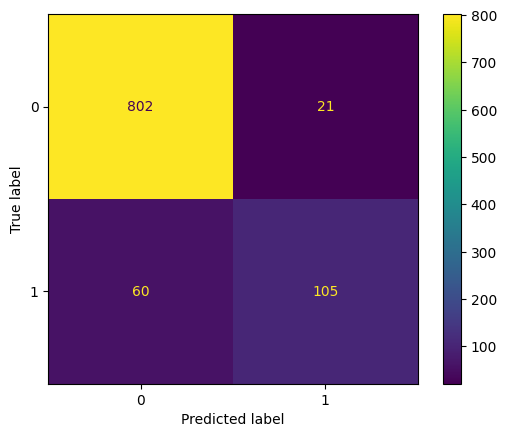

Avg_Utilization_Ratio
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Classification report 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       823
           1       0.84      0.65      0.73       165

    accuracy                           0.92       988
   macro avg       0.89      0.81      0.84       988
weighted avg       0.92      0.92      0.92       988

Confusion matrix 


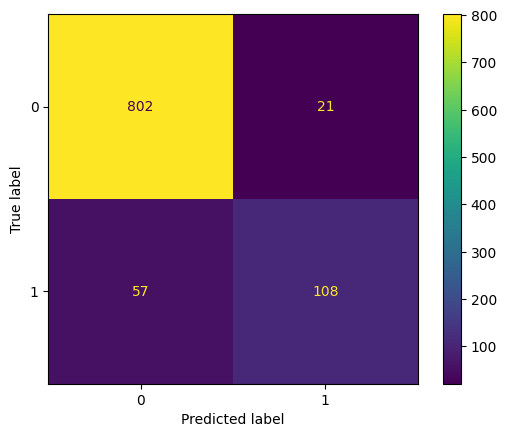

In [24]:
print('Card_Category')
model4drop_list = ['Months_on_book', 'Customer_Age', 'Gender', 'Credit_Limit', 'Avg_Utilization_Ratio']
model4 = trainModel(model4drop_list)
#####
print('Months_on_book')
model4drop_list = ['Card_Category', 'Customer_Age', 'Gender', 'Credit_Limit', 'Avg_Utilization_Ratio']
model4 = trainModel(model4drop_list)
#####
print('Customer_Age')
model4drop_list = ['Card_Category', 'Months_on_book', 'Gender', 'Credit_Limit', 'Avg_Utilization_Ratio']
model4 = trainModel(model4drop_list)
#####
print('Gender')
model4drop_list = ['Card_Category', 'Months_on_book', 'Customer_Age', 'Credit_Limit', 'Avg_Utilization_Ratio']
model4 = trainModel(model4drop_list)
#####
print('Credit_Limit')
model4drop_list = ['Card_Category', 'Months_on_book', 'Customer_Age', 'Gender', 'Avg_Utilization_Ratio']
model4 = trainModel(model4drop_list)
#####
print('Avg_Utilization_Ratio')
model4drop_list = ['Card_Category', 'Months_on_book', 'Customer_Age', 'Gender', 'Credit_Limit']
model4 = trainModel(model4drop_list)

- Fifth Model
    - ทดลองลดข้อมูลที่ตัดออก 1 ข้อมูลจากโมเดลที่ 4<br>
        - ถ้าเก็บข้อมูล Card_Category ไว้จะทำให้ f1-score เพิ่มขึ้นจากเดิม 1% 
        - ถ้าเก็บข้อมูล Credit_Limit ไว้จะทำให้ precision เพิ่มขึ้นจากเดิม 1% แต่แลกมากับ recall ที่ลดลง 1%
    

Card_Category
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Classification report 
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       823
           1       0.84      0.65      0.74       165

    accuracy                           0.92       988
   macro avg       0.89      0.82      0.85       988
weighted avg       0.92      0.92      0.92       988

Confusion matrix 


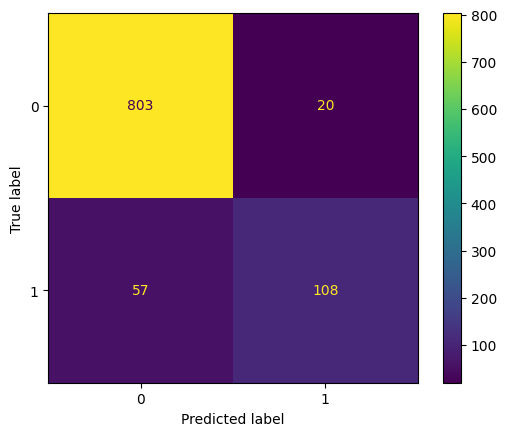

Months_on_book
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Classification report 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       823
           1       0.83      0.65      0.73       165

    accuracy                           0.92       988
   macro avg       0.88      0.81      0.84       988
weighted avg       0.92      0.92      0.92       988

Confusion matrix 


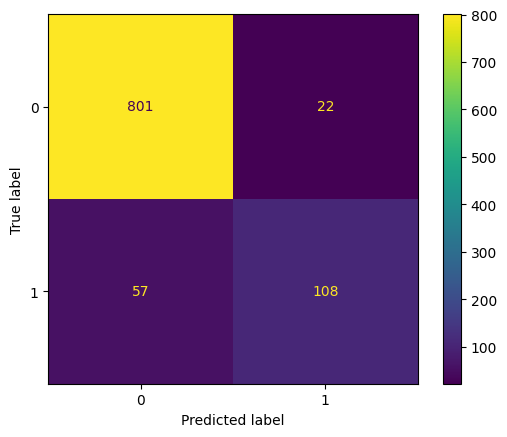

Customer_Age
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Classification report 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       823
           1       0.83      0.65      0.73       165

    accuracy                           0.92       988
   macro avg       0.88      0.81      0.84       988
weighted avg       0.92      0.92      0.92       988

Confusion matrix 


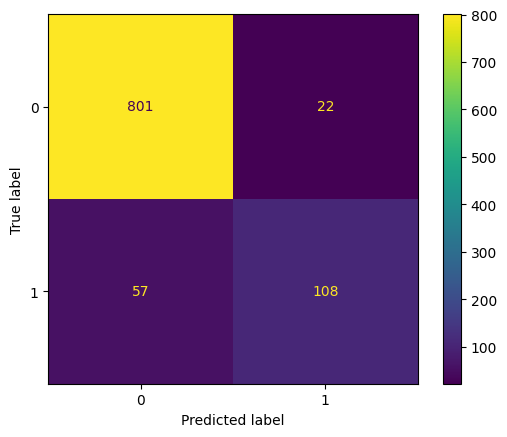

Gender
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Classification report 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       823
           1       0.83      0.64      0.73       165

    accuracy                           0.92       988
   macro avg       0.88      0.81      0.84       988
weighted avg       0.92      0.92      0.91       988

Confusion matrix 


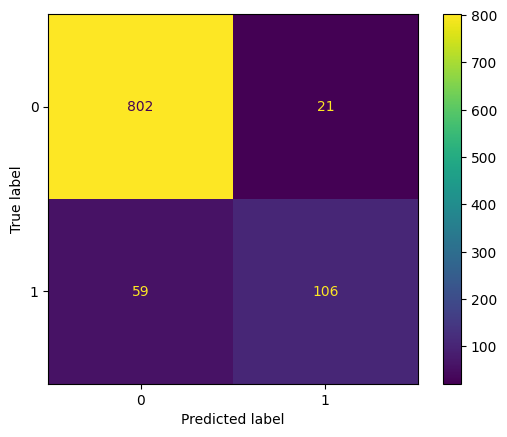

Credit_Limit
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Classification report 
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       823
           1       0.85      0.64      0.73       165

    accuracy                           0.92       988
   macro avg       0.89      0.81      0.84       988
weighted avg       0.92      0.92      0.92       988

Confusion matrix 


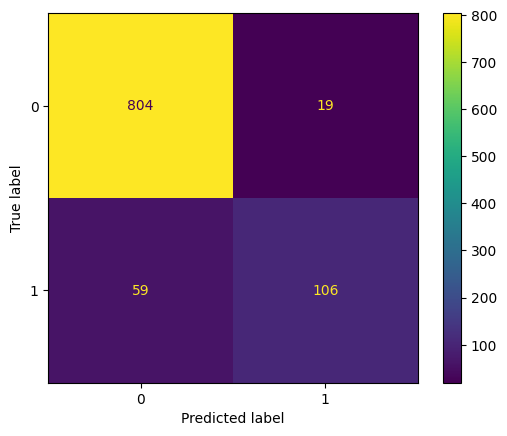

In [25]:
#####
print('Card_Category')
model5drop_list = ['Months_on_book', 'Customer_Age', 'Gender', 'Credit_Limit']
model5 = trainModel(model5drop_list)
#####
print('Months_on_book')
model5drop_list = ['Card_Category', 'Customer_Age', 'Gender', 'Credit_Limit']
model5 = trainModel(model5drop_list)
#####
print('Customer_Age')
model5drop_list = ['Card_Category', 'Months_on_book', 'Gender', 'Credit_Limit']
model5 = trainModel(model5drop_list)
#####
print('Gender')
model5drop_list = ['Card_Category', 'Months_on_book', 'Customer_Age', 'Credit_Limit']
model5 = trainModel(model5drop_list)
#####
print('Credit_Limit')
model5drop_list = ['Card_Category', 'Months_on_book', 'Customer_Age', 'Gender']
model5 = trainModel(model5drop_list)

- Sixth Model
    - ทดลองลดข้อมูลที่ตัดออก 1 ข้อมูลจากโมเดลที่ 5<br>
        - เมื่อเก็บข้อมูล Credit_Limit เอาไว้ precision และ recall เพิ่มขึ้น 1%

Months_on_book
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Classification report 
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       823
           1       0.84      0.65      0.73       165

    accuracy                           0.92       988
   macro avg       0.89      0.81      0.84       988
weighted avg       0.92      0.92      0.92       988

Confusion matrix 


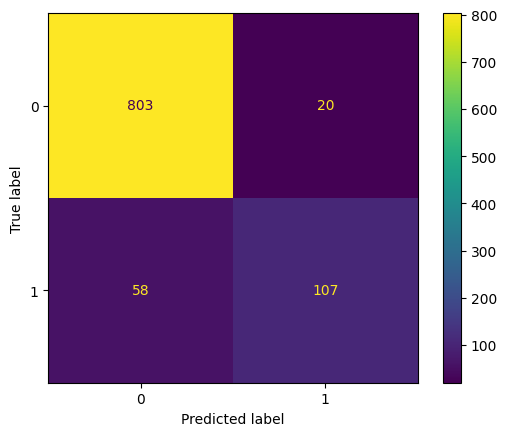

Customer_Age
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Classification report 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       823
           1       0.84      0.65      0.73       165

    accuracy                           0.92       988
   macro avg       0.89      0.81      0.84       988
weighted avg       0.92      0.92      0.92       988

Confusion matrix 


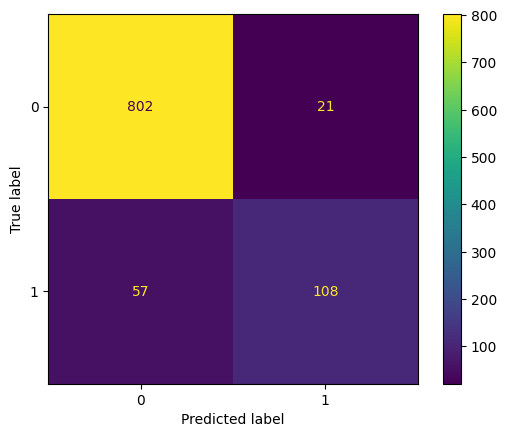

Gender
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Classification report 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       823
           1       0.83      0.64      0.73       165

    accuracy                           0.92       988
   macro avg       0.88      0.81      0.84       988
weighted avg       0.92      0.92      0.91       988

Confusion matrix 


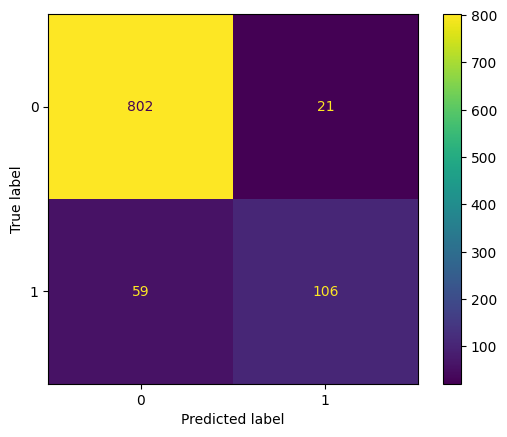

Credit_Limit
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Classification report 
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       823
           1       0.85      0.66      0.74       165

    accuracy                           0.92       988
   macro avg       0.89      0.82      0.85       988
weighted avg       0.92      0.92      0.92       988

Confusion matrix 


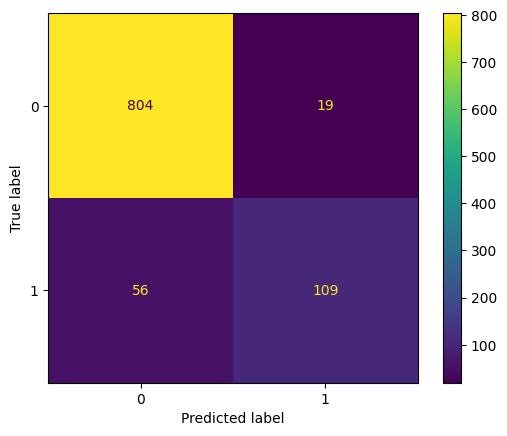

In [26]:
#####
print('Months_on_book')
model6drop_list = ['Customer_Age', 'Gender', 'Credit_Limit']
model6 = trainModel(model6drop_list)
#####
print('Customer_Age')
model6drop_list = ['Months_on_book', 'Gender', 'Credit_Limit']
model6 = trainModel(model6drop_list)
#####
print('Gender')
model6drop_list = ['Months_on_book', 'Customer_Age', 'Credit_Limit']
model6 = trainModel(model6drop_list)
#####
print('Credit_Limit')
model6drop_list = ['Months_on_book', 'Customer_Age', 'Gender']
model6 = trainModel(model6drop_list)

- Seventh Model
    - ทดลองลดข้อมูลที่ตัดออก 1 ข้อมูลจากโมเดลที่ 6<br>
        - ไม่มีโมเดลใดที่ทำให้ประสิทธิภาพของโมเดลดีขึ้น

In [ ]:
#####
print('Months_on_book')
model6drop_list = ['Customer_Age', 'Gender']
model6 = trainModel(model6drop_list)
#####
print('Customer_Age')
model6drop_list = ['Months_on_book','Gender']
model6 = trainModel(model6drop_list)
#####
print('Gender')
model6drop_list = ['Months_on_book', 'Customer_Age']
model6 = trainModel(model6drop_list)

วิเคราะห์ข้อมูลที่เราไม่ควรตัดทิ้งจากการ explore data <br>

- จาก list data columns ที่เลือกตัดซึ่งได้แก่
    - Card_Category
    - Avg_Open_To_Buy
    - Months_on_book
    - Customer_Age
    - Gender
    - Credit_Limit
    - Avg_Utilization_Ratio
<br>
<br>

- พบว่าข้อมูลที่ไม่ควรตัดออกได้แก่
    - Credit_Limit
    - Avg_Utilization_Ratio
    - Avg_Open_To_Buy
    - Card_Category

In [ ]:
#explore_cut_data = ['Card_Category', 'Avg_Open_To_Buy', 'Months_on_book', 'Customer_Age', 'Gender', 'Credit_Limit', 'Avg_Utilization_Ratio']
explore_cut_data = ['Card_Category', 'Avg_Open_To_Buy', 'Months_on_book', 'Customer_Age', 'Gender', 'Credit_Limit', 'Avg_Utilization_Ratio', 'Attrition_Flag']
final_cut_data = ['Months_on_book', 'Customer_Age', 'Gender']
keep_data = list(set(explore_cut_data) - set(final_cut_data))
print('keep data: ' + str(keep_data))

Plot กราฟหาความผิดพลาดจากการตัดข้อมูลที่ไม่ควรตัดออกพบว่า
- ข้อมูล Credit_Limit เมื่อ plot กับ Total_Trans_Amt, Total_Trans_Ct เห็นการแบ่งกลุ่มของข้อมูล Output ซึ่งควรเป็นข้อมูลที่เก็บเอาไว้
- ข้อมูล Avg_Utilization_Ratio เมื่อ plot กับ Credit_Limit, Avg_Open_To_Buy เห็นถึงความสัมพันธุ์ทางคณิตศาสตร์จริงแต่บริเวณขอบพบถึงการแบ่งกลุ่มของ Output ประเภท Attrited Customer ซึ่งอาจเป็นเหตุผลที่ส่งผลให้การมีข้อมูลประเภทนี้ส่งผลดีต่อโมเดล
- ข้อมูล Card_Category เมื่อ plot กับ Total_Trans_Ct พบเห็นการแบ่งกลุ่มของ Output ได้อย่างดี

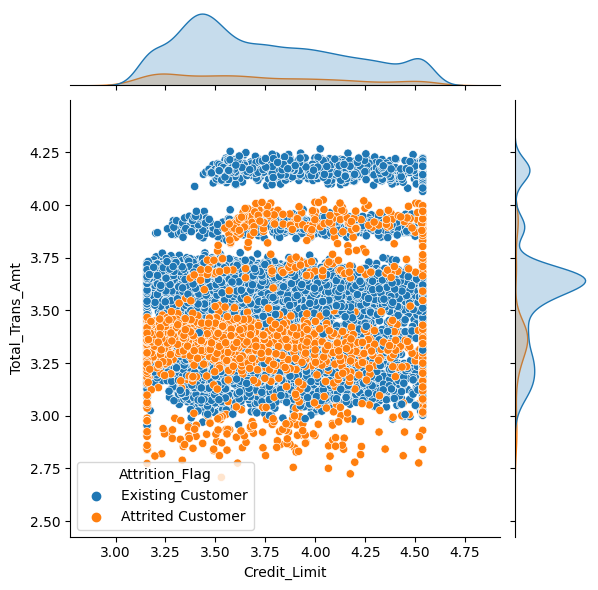

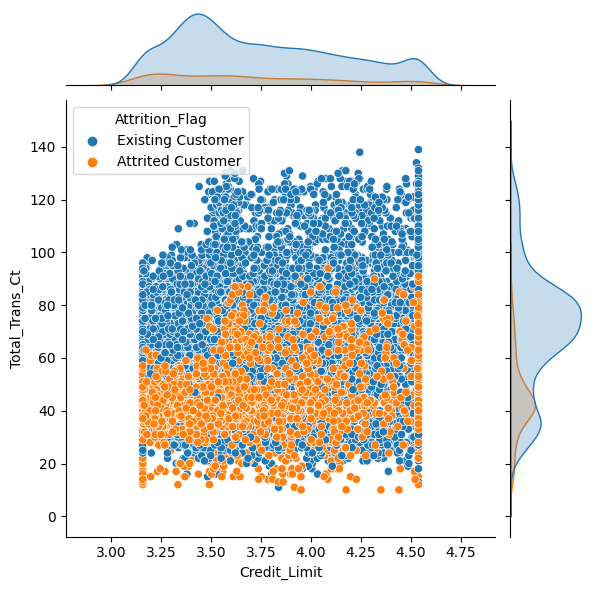

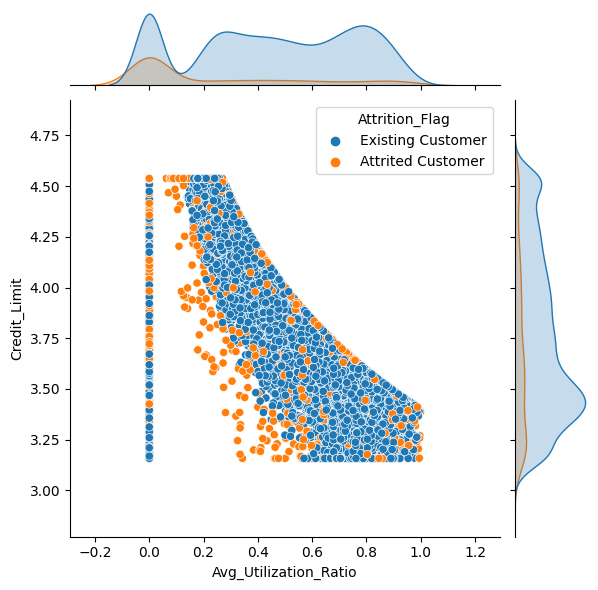

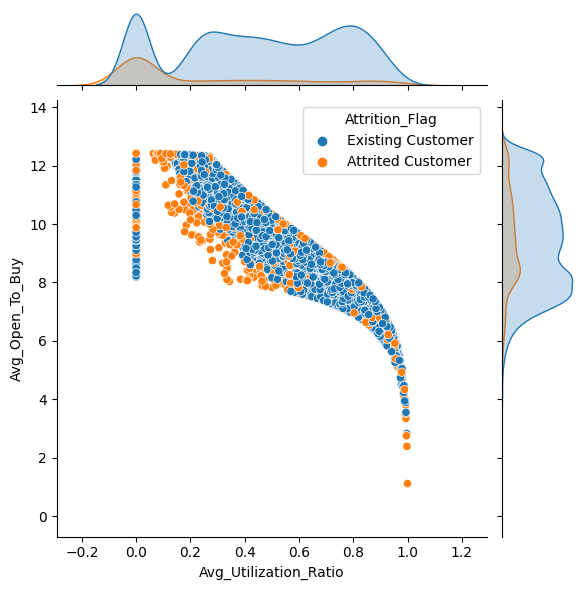

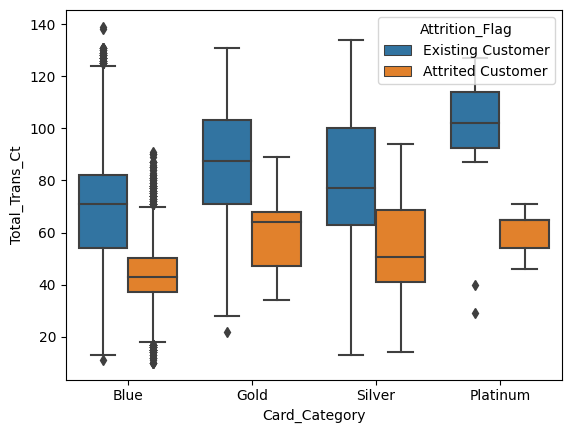

In [28]:
##### import dataset
df = pd.read_csv('credit_card_churn.csv')
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'CLIENTNUM'], axis=1)
##### remove outlier
df = df.loc[df['Customer_Age'] <= 66]
df = df.loc[df['Total_Ct_Chng_Q4_Q1'] <= 1.6]
df = df.loc[df['Months_Inactive_12_mon'] < 6]
df = df.loc[df['Total_Amt_Chng_Q4_Q1'] <= 1.6]
##### correct skewed data
df['Credit_Limit'] = np.log10(df['Credit_Limit'])
fitted_data, fitted_lambda = stats.boxcox(df['Avg_Open_To_Buy'])
df['Avg_Open_To_Buy'] = fitted_data
df['Total_Trans_Amt'] = np.log10(df['Total_Trans_Amt'])
df['Avg_Utilization_Ratio'] = (df['Avg_Utilization_Ratio'])**(1/2)

sns.jointplot(data = df, x = 'Credit_Limit', y = 'Total_Trans_Amt', hue = 'Attrition_Flag')
plt.show()
sns.jointplot(data = df, x = 'Credit_Limit', y = 'Total_Trans_Ct', hue = 'Attrition_Flag')
plt.show()
sns.jointplot(data = df, x = 'Avg_Utilization_Ratio', y = 'Credit_Limit', hue = 'Attrition_Flag')
plt.show()
sns.jointplot(data = df, x = 'Avg_Utilization_Ratio', y = 'Avg_Open_To_Buy', hue = 'Attrition_Flag')
plt.show()
sns.boxplot(data = df, x = 'Card_Category', y = 'Total_Trans_Ct', hue = 'Attrition_Flag')
plt.show()


##### Result and Analysis

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Classification report 
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       823
           1       0.85      0.66      0.74       165

    accuracy                           0.92       988
   macro avg       0.89      0.82      0.85       988
weighted avg       0.92      0.92      0.92       988

Confusion matrix 


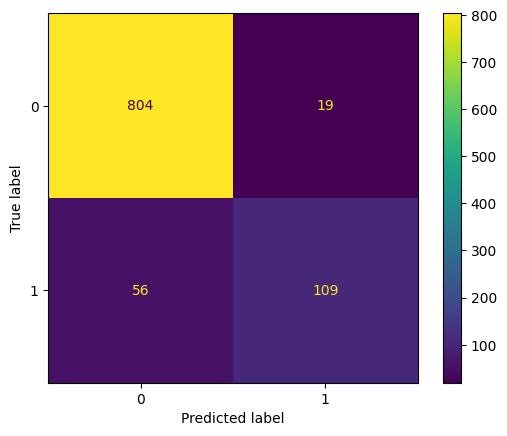

In [30]:
final_data_list = ['Months_on_book', 'Customer_Age', 'Gender']
final_model = trainModel(final_data_list)

- จาก confusion matrix แสดงถึงซึ่งจำนวนของข้อมูลที่โมเดลทำนายเทียบกับข้อมูลจริงเพื่อเปรียบเทียบความถูกต้องและแม่นยำของโมเดล 
    โดยจาก การใช้ชุดข้อมูล จำนวน  988 ตัว โดยมี Existing Customer 860 คน และ Attried Customer 128 คน ผลลัพธ์จากการทดสอบโมเดลนี้สามารถ ทำนาย Existing Customer ได้ 804 คน ซึ่งทำนายผิดไป 56 คน
    และทำนาย Attried Customer ได้ 109 และทำนายผิดไป 19 คน

- ผลลัพธ์เมื่อพจารณาจาก Attried Customer ที่ได้คือ
    - ค่า precision คือ 0.85 ที่มาจากค่าที่ได้จากการคำนวณอัตราส่วนของจำนวนข้อมูลที่โมเดลทำนายว่าเป็น Attried Customer ได้ถูกต้อง ต่อ จำนวนที่ข้อมูลที่ถูกทายว่า Attried Customer ทั้งหมด จาก Confusion matrix ซึ่งก็คือ $$\frac{109}{19 + 109} = 85\text{\%} $$
    - ค่า recall    คือ 0.66 ที่มาจากค่าที่ได้จากการคำนวณอัตราส่วนของจำนวนข้อมูลที่โมเดลทำนายว่าเป็น Attried Customer ได้ถูกต้อง ต่อ จำนวนที่ข้อมูลที่เป็น Attried Customer ในความเป็นจริง  จาก Confusion matrix ซึ่งก็คือ $$\frac{109}{56 + 109} = 66\text{\%} $$
    - ค่า f1-score  คือ 0.74  คือค่าเฉลี่ยระหว่างค่า recall และ precision คือ $$\frac{2*0.85*0.66}{0.85 + 0.66} = 0.74 $$
<br>
<br>

- ผลลัพธ์เมื่อพจารณาจาก Exsiting Customer ที่ได้คือ
    - ค่า precision คือ 0.93 ที่มาจากค่าที่ได้จากคำนวณอัตราส่วนของจำนวนข้อมูลที่โมเดลทำนายว่าเป็น Exsiting Customer ได้ถูกต้อง ต่อ จำนวนที่ข้อมูลที่ถูกทายว่า  Exsiting Customer  ทั้งหมด จาก Confusion matrix ซึ่งก็คือ $$\frac{804}{56 + 804} = 93\text{\%} $$
    - ค่า recall    คือ 0.98 ที่มาจากค่าที่ได้จากคำนวณอัตราส่วนของจำนวนข้อมูลที่โมเดลทำนายว่าเป็น Exsiting Customer ได้ถูกต้อง ต่อ จำนวนที่ข้อมูลที่เป็น Exsiting Customer ในความเป็นจริง จาก Confusion matrix ซึ่งก็คือ $$\frac{804}{19 + 804} = 98\text{\%} $$
    - ค่า f1-score  คือ 0.96 คือค่าเฉลี่ยระหว่างค่า recall และ precision คือ $$\frac{2*0.0.93*0.98}{0.93 + 0.98} = 0.96 $$
<br>
<br>

- ซึ่งสาเหตุที่โมเดลมีค่า precision และ recall ของ Existing Customer สูงกว่า Attried Cunstomer เพราะว่า ชุดข้อมูลที่ใช้ได้การเทรนมีความไม่สมดุลกันระหว่าง Existing Customer และ Attried Cunstomer
ทำให้ model สามารถทำนายข้อมูลที่เป็น Existing Customer  เพราะ ข้อมูลที่เป็นExisting Customer มีมากกว่า แต่หากเรานำโมเดลนี้ไปใช้กับชุดข้อมูลอื่นๆ ที่มีความสมดุลมากกว่านี้อาจทำให้ความเป็นยำของโมเดลมีค่าลดลง

- เนื่องจากจุดประสงค์ของการทำโมเดลคือการสร้างโมเดลที่สามารถทำนายกลุ่มลูกค้าที่เลิกใช้บัตรเครดิต <br>
 เราจึงเลือกที่จะพิจารณา Classification Report และ Confusion Matrix เฉพาะในส่วนของ Attried Customer ซึ่งเป็นกลุ่มที่เราสนใจ
 ในการเลือกโมเดล ่วาโมเดลใดมีประสิธิภาพและเหมาะที่จะนำมาใช้มากที่สุด 


การพิจารณาเลือก model ขึ้นอยู่กับจุประสงค์ของผู้ใช้ซึ่งก็คือธนาคารผู้ให้บริการบัตรเครดิต 
ว่าจะเลือกใช้โมเดลที่เน้นค้า precision สูง หรือค่า recall สูง

- หากต้องการที่จะหาลูกค้าได้อย่างแม่นยำและไม่อยากสูญเสียทุนในการกระตุ้นลูกค้าให้กลับมาใช้บัตรเครดิตให้กับคนที่ใช้บัตรอยู่แล้ว ก็จะต้องเลือกพิจารณาเลือก โมเดลที่มีค่า Precision สูง 
เพราะเป็นการเทียบจำนวนการทายว่าเป็น Attried Customer ได้อย่างถูกต้องกับจำนวนที่ถูกทายว่าเป็น Attried Customer ทั้งหมดโดยไม่สนใจจำนวนข้อมูลที่ถูกทายว่าไม่ได้เป็น Attried Customer ทั้งๆที่ใช่

- หรือว่าหากต้องการที่จะหาลูกค้าได้อย่างแม่นยำโดย ไม่อยากสูญเสียโอกาสที่จะเจอ และไม่คำนึงถึงต้นทุนที่ใช้ในการกระตุ้นลูกค้า ก็ควรเลือกพิจารณาเลือกโมเดลที่มีค่า Recall สูง เพราะเป็นการเทียบจำนวนการทายว่าเป็น Attried Customer ได้อย่างถูกต้อง เทียบกับ จำนวนของข้อมูลที่เป้น Attried Customer จริงและไม่สนใจข้อมูลที่ถูกมายว่าเป็น Attried Customer ทั้งๆที่ใม่ใช่

